As you've learned how to implement a neural network, in this week, you'll learn the practical aspects of how to make your neural network work well. 

When training a neural network, you have to make a lot of decisions, such as 
- how many layers will your neural network have? 
- how many hidden units do you want each layer to have? 
- what's the learning rate?
- what are the activation functions you want to use for the different layers? 
        
When you're starting on a new application, it's almost impossible to correctly guess the right values for all of these, and for other hyperparameter choices, on your first attempt. So, in practice, applied machine learning is a highly iterative process, in which you often start with an idea, such as you want to build a neural network of a certain number of layers, a certain number of hidden units, maybe on certain data sets, and so on. And then you just have to code it up and try it, by running your code. You run an experiment and you get back a result that tells you how well this particular network, or this particular configuration works. And based on the outcome, you might then refine your ideas and change your choices and maybe keep iterating, in order to try to find a better and a better, neural network.
    
**In this first week, we'll first talk about**

- Setting up the ratios of train, dev, and test data splits
    - Distribution match of dev and test set
- Bias Variance diagnostic to guide the training, model selection, hyperparameter tuning and finally model evaluation
    - One task at a time principle
    - Overfitting
        - Weight Decay using L2 Regularization
            - Frobenius Norm
            - Regularization parameter effects overfitting and underfitting using tanh activation function
        - Drop out technique
            - Switching off dropout to check the learning curve/process and switching on after the confirmation
                - Inverted Dropout
                - Spreading Weights 
        - Adding more data using Data Augmentation to avoid overfitting
        - Early Stopping
            - Orthogonalization (one task at a time principle)
        - NN Model architecture search
    - Underfitting
        - Increasing the Model architecture or complexity
        - Running for longer iterations
        - NN Model architecture search
    - Some notes on Bias Varaince Trade off
 - Faster Training and optimization techniques
     - Normalization and standardization of inputs
     - Vanishing Gradients and Exploding Gradients
         - Weight Initializaton techniques to reduce the effect of vanishing or exploading gradients to some extent
             - Xavier initialization
             - He Initialization
             - Joshua Intialization
 - Some more tips to improve the NN
     - Numerical approximation using Finite Difference technique of gradients
         - One Sided numerical approximation
         - Two sided numerical approximation
     - Gradient Check
         - Gradient approximation using 2 sided finite differences technique with epsilon
         - Analytical gradient using usual gradient descent backpropagation
         - Difference between the above 2 vectors using euclidean distance
         - Switching off dropout technique to perform gradient check and switching it on again once done

### Train / Dev / Test sets
    Once the base NN architecture is defined, we will need to improve the model further using the guidance from train and dev sets. This is technically called "Model Selection" using Train and Dev set. Once the final model is selected, we usually perform the model evaluation on the test set to quantify its generalized performance i.e unbiased estimate of how well your model is doing on the unseen data
    
#### But how to split the data into 3 halves?
     Making good choices in how you set up your training, development, and test sets can make a huge difference in helping you quickly find a good high-performance neural network.

    Pre DeepLearningEra - Traditional ratio:
    ----------------------------------------
        As you have data in range of 100's, 1000's or 10000's the split was
                Train - 60%,  Val - 20%, Test - 20%
                          (or)
                Train - 70%,  Val - 15%, Test - 15% 
                        (or)
                 Train - 70%,  Val - 20%, Test - 10%  
         
    Post DeepLearningEra:
    ---------------------
    Since there is enormous amount of big data is made available, data in billions, trillions.., then the trend of splitting ratios have changed so that your dev and test sets have been becoming a much smaller percentage of the total. 
    
    Because remember, the goal of the dev set or the development set is that you're going to test different algorithms on it and see which algorithm works better. So the dev set just needs to be big enough for you to evaluate, you might not need a whole 20% of your data for that. 
    
    For eg, if you have a million training examples, you might decide that just having 10,000 examples in your dev set is more than enough to evaluate which algorithm does better. And in a similar way, the main goal of your test set is, given your final classifier, to give you a pretty confident estimate of how well it's doing. And again, if you have a million examples, maybe you might decide that 10,000 examples is more than enough in order to evaluate a single classifier and give you a good estimate of how well it's doing. 
    
    So the ratio is,
                        Train - 98%,  Val - 1%, Test - 1%
                
      There are also applications where, if you have even more than a million examples, you might end up with, you know, 
     
                          Train - 99.5%,  Val - 0.25%, Test - 0.25%
                                      (or may be)
                          
                           Train - 99.5%, Dev - 0.4%, Test - 0.1% 
     
     
    In summary, when setting up your machine learning problem, Using traditional ratios of  train, dev and test sets, and if you have a relatively small dataset,  might be okay. But if you have a much larger data set, it's also fine to set your dev and test sets to be much smaller than your 20% or even 10% of your data. 

**Note on the distributions of train, dev and test sets:**
    
    In the era of modern deep learning, "more and more people train on mismatched train and test distributions" which is not ideal 

    Let's say you're building an app that lets users upload a lot of pictures and your goal is to find pictures of cats in order to show your users. Maybe all your users are cat lovers. Maybe your training set comes from cat pictures downloaded off the Internet, but your dev and test sets might comprise cat pictures from users using your app. So maybe your training set has a lot of pictures crawled off the Internet but the dev and test sets are pictures uploaded by users. Turns out a lot of webpages have very high resolution, very professional, very nicely framed pictures of cats. But maybe your users are uploading, you know, blurrier, lower res images just taken with a cell phone camera in a more casual condition. And so these two distributions of data may be different. 
    
    The rule of thumb in this case is:
    
**"Make sure that the Train, dev and test sets come from the same distribution. If that's not possible, atleast make sure that Dev and test sets come from same distribution".**
    
    This is because you will be using the dev set to evaluate a lot of different models and trying really hard to improve performance on the dev set, it's nice if your dev set comes from the same distribution as your test set. 
    
    Sometimes your training set data might not come from the same distribution as your dev and test sets(like getting training data by crawling from internet). But you find that so long as you follow this rule of thumb, that progress in your machine learning algorithm will be faster.
    
**"Finally, it might be okay to not have a test set"**
    
    Remember, the goal of the test set is to give you a unbiased estimate of the performance of your final network, you selected. But if you don't need that unbiased estimate, then it might be okay to not have a test set. So what you do, if you have only a dev set but not a test set, is you train on the training set and then you try different model architectures, evaluate them on the dev set, and then use that to iterate and try to get to a good model. 
    
    Because you've fit your data to the dev set, this no longer gives you an unbiased estimate of performance. But if you don't need one, that might be perfectly fine. 
    
    Note: In the machine learning world, when you have just a train and a dev set but no separate test set, most people will call the training set as training set but they will call the dev set the test set. But what they actually end up doing is using the test set as a hold-out cross validation set, which maybe isn't completely a great use of terminology, because they're then overfitting to the test set. So when the team tells you that they have only a train and a test set, know that this us actually a dev set. And this is actually okay practice if you don't need a completely unbiased estimate of the performance of your algorithm. 
    
    So having set up a train dev and test set will allow you to more efficiently measure the bias and variance of your algorithm so you can more efficiently select ways to improve your algorithm. 

#### Model Selection and Model Evaluation using Bias variance Diagnostic
    Once we are done with model set up and initial training phase, we should perform bias variance diagnostic to know whether the model is suffering with Bias or variance.
    
    To perform the diagnostic, we will need to know, cost w.r.to to training data J_train, the cost w.r.to to dev or validation set J_val(sometimes also called J_cv), and the baseline performance like human performance or previously well performed model on the task.
    
    The baseline error is sometimes also called "Bayes error"
        Eg: error that a human could make in identifying the blurred images is also called Baseline error
        
    J_train is compared with baseline and J_cv is compared with J_train to identify the bias or variance problem.
    
    High bias -                        J_train >> bayeserror, J_train ~ J_cv 
    High variance -                    J_train <= bayeserror, J_cv >> J_train
    High variance and High Bias -      J_train >> bayeserror, J_cv >> J_train (overfits some part, underfits some part of training data)
    
    Our goal is to find a model that has low bias and low variance.
    
    When we are dealing with 2dimesional or 3 dimensional, we can visualize via plot to know whether the model is overfitting or underfitting. But, for higher dimensional data, we have to use the costs and bias variance diagnostic to guide this process
    
    NN is also a iterative process where first we will findout whether the model is suffering from bias or variance from the J_train, J_cv and the baseline.
    
    If it is suffering from bias problem using above analysis(underfitting - very simple model):
        - Increase the Model Architecture by making it deeper (also making sure to use regularizers to avoid overfitting)
        - Train the model for longer durations
        - Reduce the regularization parameter lambda
        - Using NN architecture search
        
    As the model is deeper enough making it bias resistant, 
    
    If it is suffering from variance problem using above analysis(overfitting - complex model) :
        - Use the kernel regularizers like L2 regularization to perform "Weight Decay" or "Weight Shrinking" 
            (see in MLSpec course for understanding the shrinking concept)
            - Increase the regularization parameter lambda 
                - This gives the zeroing(almost) effect of some of the neurons weitghs and can be interpret as knocking out the effect of those neurons from the output contribution
        - Use techniques like drop out
            - This can be interpreted as knocking out some nuerons randomly for every iteration forward and backward prop to avoid overfitting of deeper network
        - Add more data
        - Using NN architecture search    
        
    Using the Bias variance analysis, we can decide on what action perform further
    
    This diagnostic also helps in selecting the model hyperparameters like learning rate, no. of layers, no. of nuerons in each layer, no. of iterations, regualrization parameter lambda, mini batch size, momentum, activation functions and so on.
    
    We have to find out J_train and J_cv for different hyperparameter and identify the best hyperparameter where J_cv is less and closer to J_train.
    
    Note: The Hyperparameter selection can be performed using the principle "One at a time" instead of working with all the hyperparameter at a time which is computationally expensive and time consuming. Both yields almost closer results.
    
    This way, using Bias variance diagnosis, we ll get to select the final best model to train on. 
    
    Once the model selection is done, we ll use the model on the test set to get the generalized unbiased estimation of our model which is nothing but model evaluation
    
    Bias variance trade off
    ----------------------
    In the pre deep learning or traditional era, when the bias is decreased, the variance is increased and vice versa. Hence practioners used to use the term Bias variance trade off which represents find the sweet spot where increasing or decreasing one would not effect the other. At that time there were not many tools to work on only either bias or only either variance.
    
    In the deep learning era, there are tools to only work on reducing only bias (using complex network architecture) until the network id regularized properly. AS the deeper architecture is already bias free model, the variance can be reduced by adding more data, regularizers, dropout techniques etc

### Regularization techniques to handle overfitting
### L2 Regularization
    For Neural Network, the famous regularizer that almost everytime works is L2 regularizer which is nothing but squared L2norm of the paramaters
                
${||W^{[l]}||_2}^2 = (\sqrt {Σ_{l=1}^L} W^{[l]^2})^2$

Here in ${||W^{[l]}||_2}$, the subscript 2 represents the norm is L2 norm

But for Neural Networks, eventhough we perform L2 Norm, but we call it "Forbenius Norm" because of arcane linear algebra reasons of performing L2 norm for the matrix of vectors. Represented as ${||W^{[l]}||_F}^2$



$J = 1/m \; {Σ_{i=1}^m L(y^i, \hat y^i)} + \lambda / 2m \; Σ_{i=1}^{n^{[l]}} Σ_{j=1}^{n^{[l-1]}} W^{[i, j]^2}$

And the gradients are added an extra term "$\lambda / m \; W$ " => $dW = ∂J/∂W = backpropeq + \lambda / m \; W$

Because of this we get the shrinking effect of weight when updating the weights using update rule $W := W - \alpha dJ / dW$
    
$W := W - \alpha (backpropeq + \lambda / m \; W)$
    
$W := (1- \alpha \lambda/m \;) W - \alpha \; backpropeq $

Observe that W is slightly lesser than the 1. This is the "shrinking effect of W" or "Weight decay".

This weight decay gives the shrinking effect of weights and thus making them low. If the weights are low, then it represent a non complex model. Note that the regularizaiton parameter handles how much the shrinking should be. If lambda is higher, then W will be shrinked highly (almost closes to zero's) and this may also lead to high bias model. If lambda is lower (say lambda close to 0) it means it doesnt have the regularization effect and this can lead to overfitting.

##### How regularization prevents overfitting?


    Before adding regularization parameter lambda, the cost function contains the objective function to fit the training data well and the aim of gradient descent is to keep this cost minimum. With regularization, we know that regularization parameter lambda is added to the cost function. If we increase the lambda to be a larger number, since the objective is to make the cost function minimum, the gradient descent algorithm tries to keep the parameters W small so that the overall cost function is minimum. This sometimes also make the algorithm learn more simple(High bias)  model because the algorithm is concentrated on reducing this regularization term more than reducing the training objective. This way, regularization makes the magnitude of parameters W smaller that signifies simpler model. 
    
    In case of NN, As your regularization lambda is set to be really, really big, that'll be really incentivized to set the weight matrices, W, to be reasonably close to zero. So one piece of intuition is maybe it'll set the weight to be so close to zero for a lot of hidden units that's basically zeroing out a lot of the impact of these hidden units. And if that's the case, then, you know, this much simplified neural network becomes a much smaller neural network. It turns out that what actually happens is, it'll still use all the hidden units, but each of them would just have a much smaller effect. But you do end up with a simpler network, and as if you have a smaller network that is, therefore, less prone to overfitting
    
    If the regularization parameter lambda is smaller or very close to zero, then the algorithm doesnt concentrate of pushing the weights more, rather than it concentrates on the training objective in the cost function. This sometimes again leads to overfitting.
    
    So, the regularization parameter lambda is a hyperparameter that can be tuned

###### Another intution of how regularization parameter effects overfitting  and underfitting using tanh activation function
    Here's another attempt at additional intuition for why regularization helps prevent overfitting. 
    And for this, I'm going to assume that we're using the tan h activation function, which looks like this. 
                    g(z) = tanh(z) = tanh(w.x + b)
    
    Notice that so long as z is quite small, so if z takes on only a smallish range of parameters, maybe around here the red curly brace at the center, then you're just using the linear regime of the tan h function. Only if z is allowed to wander, you know, to larger values or smaller values like so, that the activation function starts to become less linear(other 2 curly braces)
    
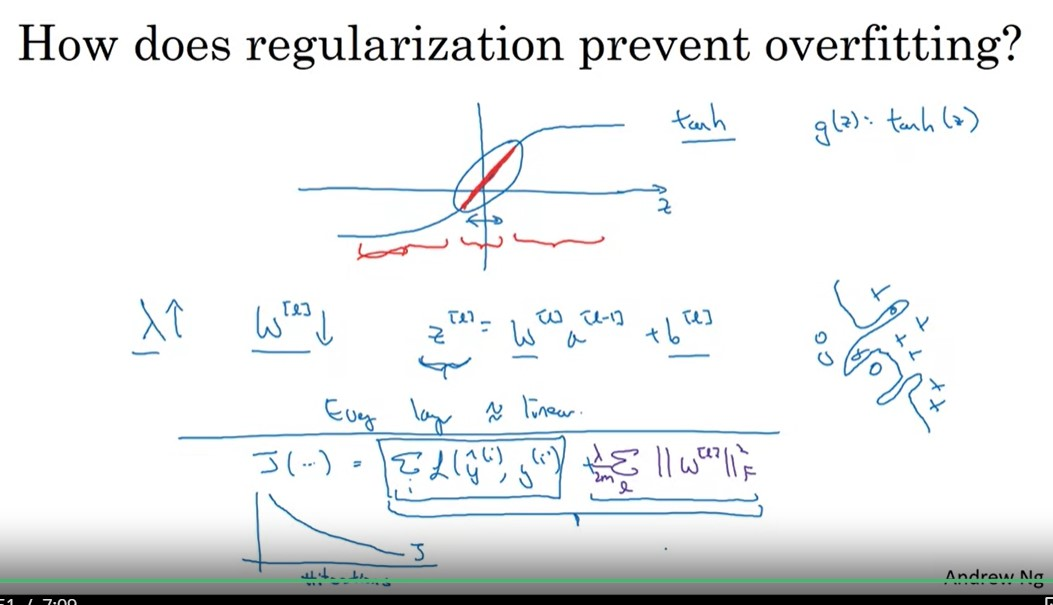  
    
    So the intuition you might take away from this is that if lambda, the regularization parameter is large, then you have that your parameters will be relatively small, because they are penalized being large in the cost function. And so if the weights, W, are small, then because z = W a_prev + b. 
    
    But if W tends to be very small, then z will also be relatively small. And in particular, if z ends up taking relatively small values, just in this little range of (middle curly braces in the above image), then g(z) will be roughly linear. So it's as if every layer will be roughly linear, as if it is just linear regression. And so even a very deep network, with a deep network with a linear activation function is, at the end of the day, only able to compute a linear function. So it's not able to fit those very, very complicated decision, very non-linear decision boundaries. 
    
    So just to summarize, if the regularization parameters are very large, the parameters W very small, so z will be relatively small, kind of ignoring the effects of b for now. And so the activation function if it's tanh, say, will be relatively linear. And so your whole neural network will be computing something not too far from a big linear function, which is therefore, pretty simple function, rather than a very complex highly non-linear function. And so, is also much less able to overfit.
    
    Before wrapping up our discussion on regularization, I just want to give you one implementational tip, which is that, when implementing regularization, we took our definition of the cost function J and we actually modified it by adding this extra term that penalizes the weights being too large. And so if you implement gradient descent, one of the steps to debug gradient descent is to plot the cost function J, as a function of the number of iterations of gradient descent, and you want to see that the cost function J decreases monotonically after every iteration of gradient descent. 
    
    And if you're implementing regularization, then please remember that J now has this new definition. If you plot the old definition of J, just this first term(training fit term), then you might not see a decrease monotonically. So to debug gradient descent, make sure that you're plotting, you know, this new definition of J that includes this second term(Regularization term) as well. Otherwise, you might not see J decrease monotonically on every single iteration. So that's it for L2 regularization, which is actually a regularization technique that I use the most in training deep learning models.
    
    In deep learning, there is another sometimes used regularization technique called dropout regularization. Let's take a look at that.
    
#### Some info on L1 regularization and how it is different from L2 regularization in handling overfitting
    L1 regularization, also known as Lasso regularization, encourages sparsity in a machine learning model by penalizing the absolute values of the coefficients of the model's features. In some cases, it can lead to some feature coefficients becoming exactly zero, effectively "turning off" those features in the model.

    Here's how it works:

        Regularization Term: L1 regularization adds a regularization term to the model's loss function, which is proportional to the sum of the absolute values of the feature coefficients:

        L1 Regularization Term = λ * Σ|Wᵢ|

    Where:λ is the regularization strength (a hyperparameter), Wᵢ is the coefficient of the i-th feature.
    
    Effect on Features: The optimization algorithm used to train the model (e.g., gradient descent) tries to minimize the loss function, which includes this L1 regularization term. As λ increases, the penalty for having large absolute values of coefficients becomes more significant.

    Sparsity: As a result of the L1 regularization term, some feature coefficients may be driven down to "exactly zero". Aggresively eliminates the features. This means that the corresponding features have no influence on the model's predictions. In essence, L1 regularization can be seen as a feature selection technique because it automatically selects a subset of the most important features for the task, effectively "turning off" the less important ones.

    So, yes, L1 regularization can "turn off" or effectively eliminate certain features from a model by setting their coefficients to zero, thus encouraging sparsity and simplifying the model.
    
    This is in contrast to L2 regularization (Ridge regularization), which penalizes the sum of the squared values of the coefficients and tends to shrink all coefficients toward zero but doesn't typically result in exact zeros.(less aggresive)
    L1 regularizes by turning-off some features, while L2 keeps everything but reduces their weights - that way the model still retains the flexibility from more features/ interactions

### Dropout regularization
    
    In addition to L2 regularization, another very powerful regularization techniques is called "dropout." 
    
    Let's say you train a neural network like the one on the left and that is over-fitting. Dropout technique is another way to handle overfitting in deeper NN's. Dropout techniques works in this manner:
    
    With dropout, what we're going to do is go through each of the layers of the network and set some probability of eliminating a node in neural network. 
    
    Let's say that for each of these layers, we're going to each node, toss a coin that have a 0.5 chance of keeping each node and 0.5 chance of removing each node. So, after the coin tosses, maybe we'll decide to eliminate those nodes marked with red cross marks.
    
    
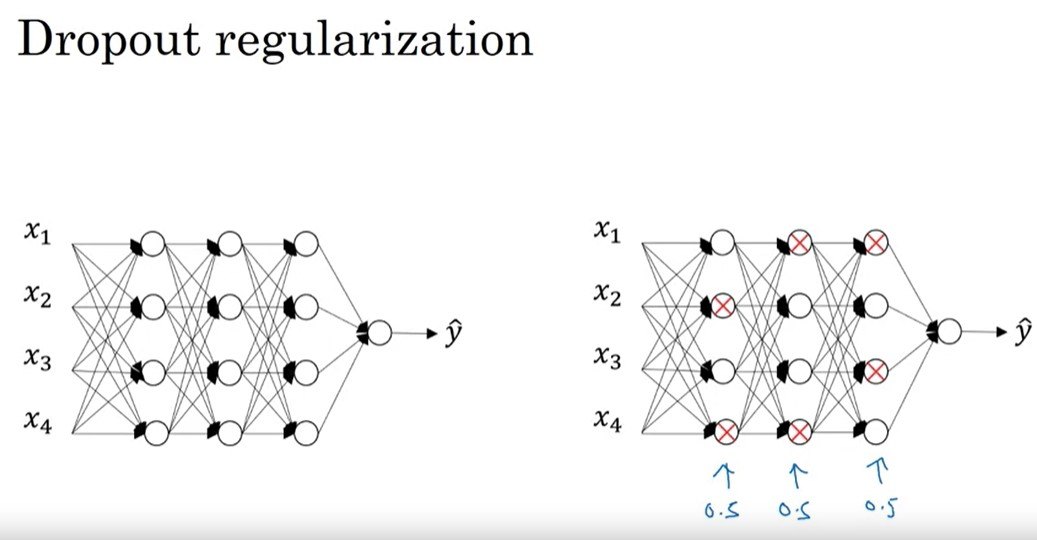
        
        Then what you do is actually remove all the outgoing and incoming connections from those nodes. So you end up with a much smaller, really much diminished network. And then you do back propagation training on the same diminished network.
    
    This is done for all traning examples so for all training examples, you would toss a set of coins again and keep a different set of nodes and dropout or eliminate different nodes for every training iteration. Each training iteration will have a different smaller network, and all the training examples are trained with that different network in an iteration.
    
    Note: There are two ways to implement dropout: you could make the dropout effect be the same on each sample in a given iteration/batch or you can make it different for every sample in every iteration. Prof Ng has us build it the latter way and that’s what the original paper also says, but it’s a bit ambiguous.
    
    It seems like a slightly crazy technique by removing nodes based on random probability factor, but this actually works.
    
    But you can imagine that, because you're training a much smaller network on each example or maybe just give a sense for why you end up able to regularize the network, because these much smaller networks are being trained.
    
    Other helpful intution is, In every training iteration, for each example, few of the neurons in each layer are knocked out or dropped off from the contribution of that example output. We can also see this as zeroing out the few of the neurons activations from each layer for each of the training ietration. 
        
        Note that zeroing out doesnt really mean zeroing few of the activations of neurons or knocking off them completely to zeros. It means, we reduce the activations magnitude to very low numbers of few neurons so that their effect on the output is minimal.

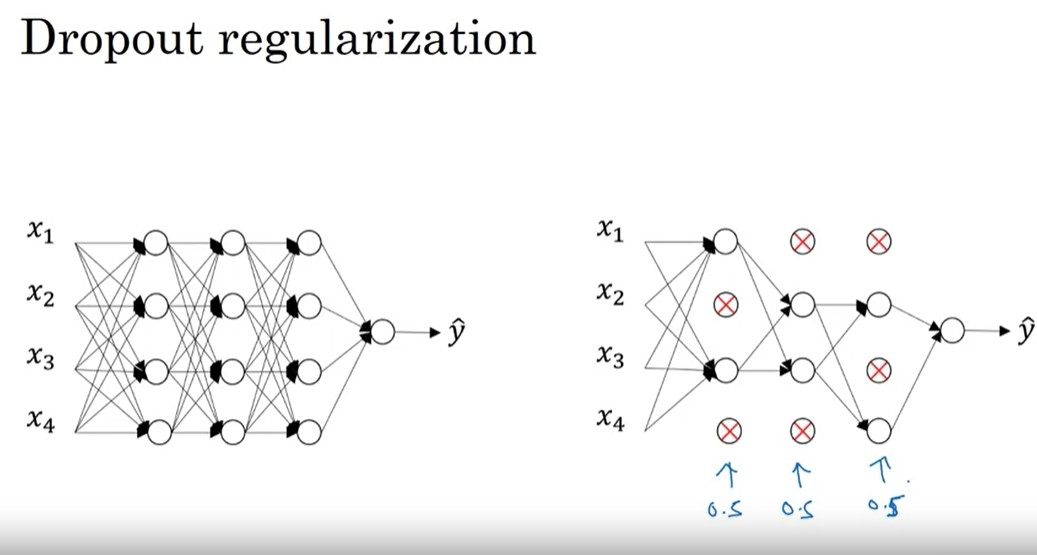
     
    Implementation of dropout:
    --------------------------
     The process on how to knock out which neurons in a layer depends on the vector "d" also called dropout vector. The d vector is same shape as the number of activations A in a particular layer. The vector d initially contains the random probabilities. This can also be seen as the chances/probabilities of the neurons to be dropped out, and they are generated randomly based on any distribution like uniform distribution or gaussian normal distrbution etc. 
                        _________________________________________________
                            d_l = np.random.randn(a_l.shape[0], a_l.shape[1])
                        __________________________________________________
        
        Once the initial d vector is defined, it is compared against a value called "keep_prob". This keep_prob can be seen as the probability that a given hidden unit will be kept. This keep_prob depicts the probability or likelihood of keeping a particular neuron in a layer or not, for current training pass(both forward and backprop) of a particular example. The keep_prob is another hyperparameter that can be tuned. 
        
        Also, keep in mind that keep_prob can be defined either globally i.e same keep_prob for the whole network or can be adjusted differently for different layers. For the layers having more neurons(meaning complex layer), we can increase the keep_prob to 0.5 so that there is a 50% chance for every neuron to knocked off. For layer with less neurons, we can make the keep_prob higher say 0.8, so now there is 20% chance for a neuron to be knocked off from the training.
        
        Coming back to knocking off, this is how it goes:
        
            If any val in dropout vector d < keep_prob, then change the respective value in d to True meaning that unit is kept, else False, meaning that value is dropped. If the dropout probability is less than the keep probability, then we retain that unit else we dropped that unit. This way, we knock off those units that returns False from the below statement.
                        _____________________________________
                                d_l = d_l < keep_prob
                        _____________________________________
        
      But how we knock off? How do we achieve it?
       --------------------------------------------
       
       After this step d will be a boolean matrix of values True(1) or False(0). We can think of these values as, True depicts that particular neuron can be kept for training, False means that it is knocked off from training.
       
       For eg, If keep_prob = 0.8, then this means that there's a 0.2 chance of eliminating any hidden unit.  
        
       Therefore, for each hidden unit in the layer, there's a 0.8 chance that the corresponding d3 will be one, and a 20% chance there will be zero. So, this random numbers in d3 being less than 0.8, it has a 0.8 chance of being one or be true, and 20% or 0.2 chance of being false, of being zero. 
       
           Note that d vector is now a boolean vector containing True(1) and False(0) values for each neuron in a layer. We multiply the d vector of the layer with the activation vector of that layer. For the neurons whose d value is False, their activation is now made to be zero, for the neurons whose d values is True, their activation value remains unchanged. This way, we knock off neurons in each layer for every training example in each iteration
                           _____________________________________
                               new_A = np.multiply(A, d)
                           _____________________________________

#### Inverted Dropout
     While implementing the dropout technique, we usually use a technique called Inverted Dropout technique. All the above statements still apply, but we add an extra scaling line of code to make it inverted dropout.
     
                         d_l = np.random.randn(a_l.shape[0], a_l.shape[1])
                         d < keep_prob
                         A = np.multiply(A, d)
                         A /= keep_prob   #Inverted drop out
                         
      The last line i.e the scaling is where we are performing the Inverted drop out technique. Usually what happens here is, we are knocking off few of the activations in each training pass by 1-keep_prob percentage. If keep_prob is 0.8, that means, we are keeping only 80 percent of the neurons activations for training. The remaining 20% of activation effect which is usually expected is lost. So, to keep up the expected activation, we divide the dropout activations with 0.8. This makes it retain the lost activation upto some extent. This is the technique we should always follow while applying dropout technique.
      
      Lets consider layer say layer3 , lets try to understand A3 /= keep_prob.
      
    We know that with Dropout, we shut down some nodes in the layer. For example, in a 50-unit layer, with a Dropout of 80%, we shut down 10 units and keep 40. It is important to understand here that we don’t physically remove the shot down units, but instead we set them to zero.

    Next, we know that once the Dropout is effected, we then calculate Z = W * a + b. In the case of a3, we would be calculating Z4 = W4 * a3 + b4, right?

    Remember that we have shut off 10 units on a3, so their contribution is zero.

    And here comes a key question:
    What will happen to Z4 if we use a3 with just “80% of its power”? it will certainly reduce the expected value of Z4, right?

    How can we solve this?
    Well, if we divide a3 by keep-prob, meaning, a3 /= keep-prob, then that will “give more power” to the 80% of active units, right?

    Think about this: what happens when you divide 1 by 0.8? 1/0.8 = 1.25 … it is bumped up!

    So when we do a3 /= keep-prob, or in the example, a3 /= 0.8, we are basically bumping up all the active units to ‘compensate’ for the missing units.
    
    Also note that, The whole cycle (forward propagation and back propagation) is performed with the dropped out units. In other words, on each cycle we drop some units, then we run forward prop on the active units, and then we run backprop on the active units. But, we are not erasing previous learning of the current shut off units.
    
    The whole purpose of drop out is to combat overfitting by reducing the network complexity, thus decreasing activation values at each layer. So why the dropped portion has to be compensated by dividing the keep_prob factor? If it has to be compensated, why do we need dropout at all in the first place? If the dropped portion is restored, then why does it still have the expected dropout effect?
    --------------------------------------------
    
        Let me try to explain this with an exercise in which we don’t re-scale:

        As you know, when you drop a number of units in the layer ‘n’, the model is “diluting” the value of the activations from the previous layer. What would happen if we don’t re-scale? lets see:

                Lets say ‘n’ = 3, so we will work on layer L3
                We are receiving the activation from the previous layer in A3.
                We calculate the dropout with keep_prob and this will shut off some values on A3 (convert them to zero).
                Then we move to calculate Z4 = W4*A3 + b4
        
        For the sake of this explanation, lets not re-scale A3. So what will happen to Z4? it will be receiving the ‘diluted’ values from A3, right? Lets say, Z4 will be ‘weaker’. So we continue the forward prop with a weaker value. We finish the forward prop, and then the backprop and repeat the cycle. So we arrive again at L3 and repeat these steps. The next Z4 will be even weaker than in the previous iteration. And this repeats on every cycle of the training.

        So how do we avoid this weakening effect? by re-scaling. When we re-scale the A3, we increase the values of the ‘live’ neurons of A3 proportionally to the keep_prob:

        We do A3 = A3 / keep_prob. Since keep_prob < 1, the effect is that the live values will be bumped-up. When we do this, the next Z4 will result in a value that is ‘strong’ and not ‘weak’.

        Also note that its "not" true that applying dropout is same as reducing the activation outputs. It is the subtle "weakening of the dependence of a given neuron on the specific inputs" from the previous layer.(see the weight spreading concept below further cells). The point is (as described in the lectures) that you are sampling a different slightly reduced network on every iteration and on every training sample in the batch. This stochastic effect of weakening the connections is what reduces the overfitting. But note that when we actually apply the trained network to make a prediction, dropout is no longer used: we simply use the trained network. That is true of all forms of regularization: they are only applied during training, not during inference. So if we don’t compensate for the reduced “expected value” of the activations, then the network in inference mode will not work as well because it’s been trained to expect less total activation value but it gets values from all the neurons in inference mode.
      
      Some notes on expected activation: 
      ---------------------------------
      If we have six units actiavtions, a1, a2,.. a6, 
                  Expected activation = a1 + a2 + a3 + a4 + a5 + a6 / 6
                  But if the keep_prob is 0.5, then each unit has 50% chance of knocking off. So, on average, 3 units will be dropped. So expected activation will be a1 + a2 + a3 / 3 without the scaling. But with inverted dropout, we keep up the expected activation by dividing it by keep_prob. What happens then is, a1 + a2 + a3 / 3 * 0.5 = 2a1 + 2a2 + 2a3 / 3. We are bumping the existing activation to some extent to keep up the expected activation almost similar.
        
        As dropout zeros certain specific neurons on each iteration. The actual neurons that are “zapped”(zerod nuerons) are different (randomly) on each sample on each iteration. Then we need to compensate for those particular missing neurons by slightly increasing the magnitude of all the other neurons that we did not “zap” in that particular iteration. Thus the total amount of “activation energy” stays (roughly) the same, but it comes from different neurons. The whole point of dropout is that it weakens the connections between particular output neurons and the input neurons at the next layer. But we don’t want an overall reduction in the amount of “energy” being output, as expressed (for example can be expressed by the L2-norm of activation vector A for the layer). In particular, Prof Ng makes an analogy to the concept of “expected value” in statistics. Even though we are zapping some neurons in the layer each iteration, we want the “expected value” of the activations viewed at the aggregate level to stay roughly constant.
        
        Dividing with keep_prob (A/keep_prob or A * (1/keep_prob) actually upscales the non zapped nuerons and eventually downscales the weights (Imagine of it as regularization parameter lambda is high in L2 regularization). If we don’t do anything like A/keep_prob, the individual values of the non-zapped neurons stays the same(actual calculated activation values). But that’s not the point, right? There are "fewer" of them outputting non-zero values right? That’s what dropout is about. The point is about the "aggregate amount of output from all the neurons in the layer" (zapped and non-zapped) taken together. One way to assess that would be to take the L2-norm of the output activation matrix with and without dropout without doing the 1/keep_prob computation and watch what happens. Then try that same experiment again with the factor of 1/keep_prob. 

    Speaking of “watching what happens”, note that keep_prob is a probability, meaning a number between 0 and 1. Try dividing 42 by 0.8 and watch what happens. It increases from 42 to 52.5.
        
        

In [92]:
np.random.seed(42)
A = np.random.randn(3, 4) #activation of one layer
print("A = " + str(A))
print("2-norm(A) = " + str(np.linalg.norm(A)))

A = [[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]]
2-norm(A) = 2.672810732482017


In [93]:
#Now let’s try multiplying by 1/0.8 and see what happens:
B = A * (1/0.8)
print("B = " + str(B))
print("2-norm(B) = " + str(np.linalg.norm(B)))


B = [[ 0.62089269 -0.17283038  0.80961067  1.90378732]
 [-0.29269172 -0.2926712   1.97401602  0.95929341]
 [-0.58684298  0.67820005 -0.57927212 -0.58216219]]
2-norm(B) = 3.3410134156025215


    If we observe, the activations of B with 1/keep_prob are increased compared to A without 1/keep_prob. Also the L2 norm is increased from A to B
    
    If you check with your calculator, you’ll see that is what happened here.
        Note: 1 divided by 0.8 increase 1 by 0.25=> 1 / 0.8 = 1.25
        
    We can also think of it as, Because we use dropout at training time but we do not use dropout at testing time. Without the correction of “divided by keep_prob”, the layer’s output at training will always be (e.g.) lower than the same layer’s output at testing. The correction attempts to compensate for that difference. It basically enlarge the contribution from each keep-neurons in compensation of the loss due to neurons dropping.
        
    In summary,
        - We are implementing dropout at training phase so it weakens the connection of neurons between one layer to another layer, thus brings out the regularization effect. But this reduces the expected activation of that layer where dropout is applied
        - Dividing by keep_prob operation increases the magnitude of activation values where as multiply by 0.5 reduce the activation values
        - In the original paper of Dropout by Prof. Hinton, the scaling factor 1/keep_prob is not added at training phase. So, to compensate this downscaled activations of training phase because of dropout without upscaling, the downscaling will be done at test phase, the activations are multiplited with keep_prob but note that no dropout will be implemented during testing and predictions. You will more about test time later below.
        - According to earlier versions Why we did scale multiply by keep_prob at test time ? 
            During training phase due to dropout, we end up with smaller network, so each neuron takes less input signal. But in the test phase, each neuron take large input signal makes activation values high, so multiply by keep_prob(notice not 1/keep_prob) at test time, the respective test activation values reduces, and become equals to training phase activation values.
         - In the original paper, it uses "W" for Training and "W*keep_prob" for Testing, while the lecture explains it as " W / keep_prob => A / keep_prob" for Training and "(W/keep_prob) * keep_prob = W" for Testing
         
**Dividing by keep_prob will help in scaling up the value of the activations by roughly the same amount that they have been reduced due to the removal of some nodes. But why do we need this value to stay roughly constant in the first place?**

    The reason is that all forms of regularization, including dropout, only happen during training. When we actually use the trained network to make predictions, there will be no dropout (which may be achieved without changing the code by simply setting keep_prob=1 during test in the code directly). So if you don’t scale up to compensate for the dropout, then the later layers will be trained in a way that won’t agree with what they actually are getting when we run normal prediction. They will be trained to expect lower aggregate “energy” from the previous layers, so things may not work as well as expected in normal “prediction” mode without dropout.
     (Prof Ng mentions this between 8:30 and 9:00 in the main lecture on Dropout.)
     
#### Self Note: 
- Try with dropout and without inverted drop scaling in training and see how it effects the testing without dropout
- Try with dropout and without inverted drop scaling in training and in testing with scaling W*keep_prob to see how it effects the testing


    Note that by following this dropout(and inverted dropout) technique, all the training examples are no longer trained with similar network architecture but a different architecture, a much smaller network rather than a bigger complex network. "Each training example" is trained on a different smaller network. So, the usual cost function no longer is comparable for every iteration and it is very hard to define or calculate J, because the architecture is different for different iterations and different for each training example as well in each iteration.
        
        If the cost function is not comparable, then we can't know whether the cost is decreasing or increasing for every iteration using learning curves. But since we want to know whether that network is actually learning or not using learning curves.
        
       Tip is: "Usual practice is to switch off the dropout technique and observe the learning curve of training process without dropout and then switch on dropout technique and start the training process once we confirmed that the model is actually learning with the basic architecture config". To switch off the dropout, we make the keep_prob = 1. This means all the units have 100% percent chance of being in the training.
    
    This way of knocking off neurons randomly for each training example and each training iteration does actually worked to overcome the overfitting of training data.
    
    For eg, For the sake of completeness, let's say we want to illustrate this with layer l=3 i.e 3rd layer l3. The probability vector d3 contains probabilities for all the neurons in that layer l3. Hence it should be as the same shape as activations vector a3 of that layer l3.
    
    So, what we are going to do is set a vector d i.e d3 is going to be the dropout vector for the layer 3.

    keep_prob is some number. It can be any number between 0 to 1. Here maybe lets use keep_prob = 0.8. 
                        
                        d3 = np.random.randn(a3.shape[0], a3.shape[1])
                        d3 = d3 < keep_prob
                        A3 = np.multiply(A3, d3) #element wise multiplication
                        
    Finally, we're going to take A3 and scale it up by dividing by 0.8 or really dividing by our keep_prob parameter.
                        
                        A3 /= keep_prob   #Inverted drop out
                        
    So, let me explain what this final step is doing. Let's say for the sake of argument that you have 50 units or 50 neurons in the third hidden layer. So maybe a3 is 50 x 1 dimensional or  maybe it's 50 x m dimensional. 
   
    So, if you have a 80% chance of keeping them and 20% chance of eliminating them, this means that on average, you end up with 10 units shut off or 10 units zeroed out(5x2=10). And so now, if you look at the value of z4(next layer thats uses a3), 
                        z4 =  W4 * A3 + b4. 
            
         On expectation, this A3 will be reduced by 20%. By which, I mean that 20% of the elements(10 units) of A3 will be zeroed out. 
         
         So, in order to not reduce this expected value of Z4 by 20%, what you do is, you need to divide the A3 by 0.8. Because this will correct or "just a bump that lost expected A3, back up by roughly 20% that you need". Meaning, it will retain that lost 20% percent by dividing it by keep_prob so that it's not changed the expected value of A3. (Diving by small number increase the magnitude of numerator. Observe in expected activation section)
   
       And its effect is that, no matter what you set to keep_prob to, whether it's 0.8 or 0.9 or even one, if it's set to one then there's no dropout, because it's keeping everything. This inverted dropout technique by dividing by the keep_prob, it ensures that the expected value of A3 remains the same.
   
       By far the most common implementation of dropouts today as far as I know is inverted dropouts. I recommend you just implement this. But there were some early iterations of dropout that missed this divide by keep_prob line, and so at test time the average becomes more and more complicated. But again, people tend not to use those other versions. 
   
       In the lab you'll notice that for different training iterations, you zero out different hidden units. And in fact, if you make multiple passes through the same training set, then on different pauses through the training set, you should randomly zero out different hidden units. So, it's not that for one example, you should keep zeroing out the same hidden units. One iteration of gradient descent, you might zero out some hidden units, and on the second iteration of gradient descent, where you go through the training set the second time, maybe you'll zero out a different pattern of hidden units. And the vector d or d3, for the third layer, is used to decide what to zero out.
                           
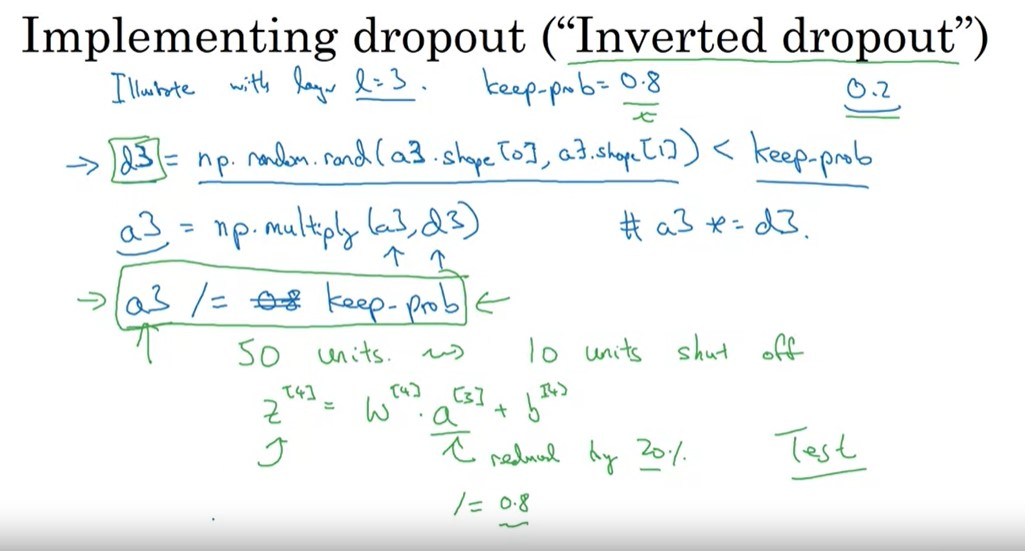

https://community.deeplearning.ai/t/inverted-dropout/12940/15


##### Dropout at test time    
    At test time(inferecing on train, dev, test), we should never use any regularization techniques be it L2 or dropout. We will usually use plain vailla forward propagation and cost without any regularization effect.
    
    You never do any kind of regularization at test time. It only happens at training time. At test time, you just use the trained network to make predictions. Even if you used dropout during training, you do not use it at all (either the zeroing of neurons or the scaling by 1/keep_prob) at test time. The point is that both of those computations are part of the regularization and that does not happen at test time.
    
    Now, having trained the algorithm at test time, here's what you would do. 
    
    At test time, you're given some x or which you want to make a prediction. And using our standard notation, a^0, the activations of the input layer to denote just test example x. 
    
    So what we're going to do is not to use dropout at test time in particular which is in a sense,
    
        Z^1= w^1.a^0 + b^1
        a^1 = g^1(z^1 Z)
        Z^2 = w^2.a^1 + b^2
        a^2 =... And so on until you get to the last layer and that you make a prediction y^. 
        
        But notice that the test time you're not using dropout explicitly and you're not tossing coins at random, you're not flipping coins to decide which hidden units to eliminate. 
        
        And that's because when you are making predictions at the test time, you don't really want your output to be random. 
        
        If you are implementing dropout at test time, that just add noise to your predictions. In theory, one thing you could do is run a prediction process many times with different hidden units randomly dropped out and have it across them. But that's computationally inefficient and will give you roughly the same result; very, very similar results to this different procedure as well. 
        
        And just to mention, the inverted dropout thing, you remember the step where we divided by the keep_prob /=keep_prob during training. The effect of that was to ensure that even when you don't implement dropout at test time, the expected value of these test activations don't change. So, you don't need to add in an extra funny scaling parameter /=keep_prob at test time. 
        
         
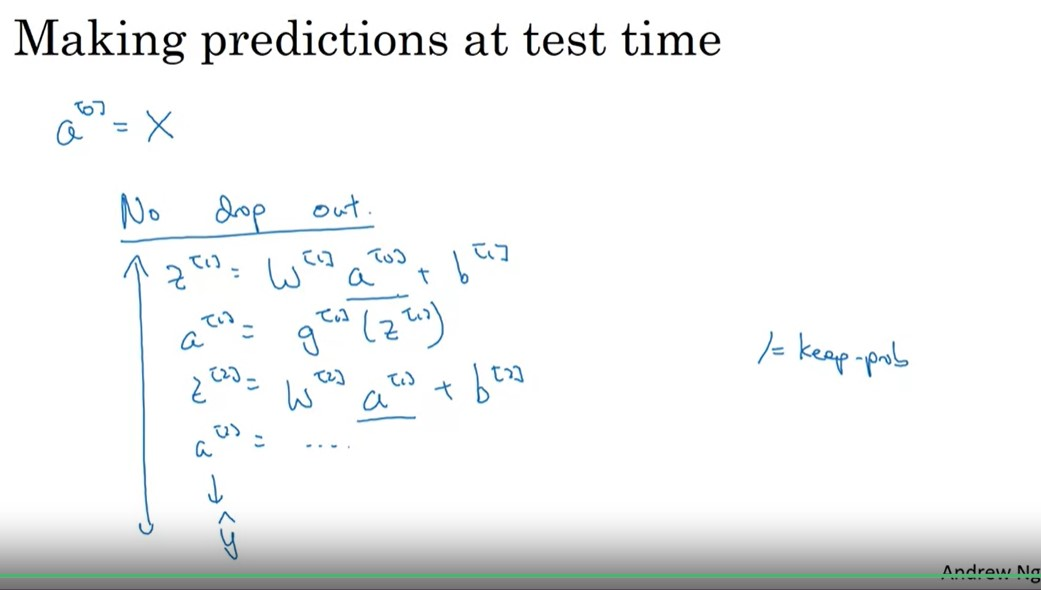

    what was meant here is the following:

    you use dropout during training. Each run has different nodes being ignored and in the end this will reduce reliance on some “key inputs”. After multiple epochs, you will have weights for all nodes, though.

    However during testing you use all of the weights. This is also what you would do during usually. Dropout is only used for training purposes.


#### Why Dropout works?

    Does this seemingly crazy thing of randomly knocking out units in your network? Why does it work? 
    
    So as a regulizer, let's give some better intuition. In the previous video, I gave this intuition that drop out randomly knocks out units in your network. So it's as if on every iteration you're working with a smaller neural network. And so using a smaller neural network seems like it should have a regularizing effect.
    
    Here's the second intuition which is, you know, let's look at it from the perspective of a single unit. The image on the left
    
    Now for this unit to do its job, it has four inputs and it needs to generate some meaningful output.
    
    Now with drop out, the inputs can get randomly eliminated. 
    
    You know, sometimes those two units will get eliminated. Sometimes a different unit will get eliminated. 
    
    So what this means is that this neuron/unit which I'm circling purple, can't rely on anyone feature, because anyone feature could go away at random or anyone of its own inputs could go away at random.
    
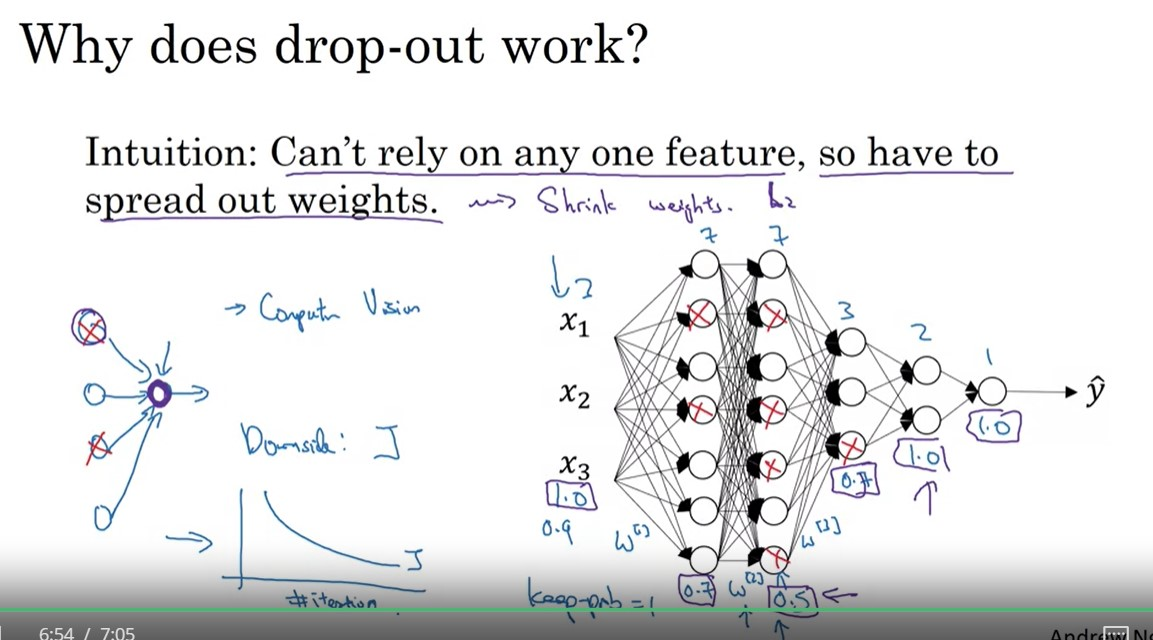
    
    So in particular, it will be reluctant to put all of its bets on, say just this upper input, right. 
    
    The unit  were reluctant to put too much weight on anyone input because it could go away. 
    
    So this unit in purple will be more motivated to "spread out its weights" and give only a little bit of weight to each of the four inputs of this unit. And by spreading out the weights this will tend to have an effect of shrinking the squared norm of the weights, and so similar to what we saw with L2 regularization. 
    
    The point is that this is an effect of how dropout works: because different random neurons are “zapped” on each iteration, it modifies the way the training happens and causes the learned connections between particular outputs of the previous layer and neurons in the given layer to be weaker(weaker connections). These weaker connections are reflected in having smaller weight values.
    
    The effect of implementing dropout is that it spread the weights and similar to L2 regularization, it helps to prevent overfitting, but it turns out that dropout can formally be shown to be an adaptive form of L2 regularization, but the L2 penalty on different weights are different depending on the size of the activation is being multiplied into that weight. Think of dropout as "L2 regularization which shrinks the weights but keeping all the weights(also features) that represents complex model but shrinked weights, rather than removing them aggresively like in L1 regularization." Dropout regularization also works the same, it keeps the complex network, but the weights are spread across the previous neurons making them small"
    
    But to summarize it is possible to show that dropout has a similar effect to L2 regularization. 
    
    Only the L2 regularization applied to different weights can be a little bit different and even more adaptive to the scale of different inputs. 
    
    One more detail for when you're implementing dropout, there could be different keep_prob for different layers.
    
    In the left, we have a network where you have 3 input features. This is 7, 7, 3, 2, 1 hidden units. So one of the parameter(hyperparameter) we have to choose was the keep_prob which is a chance of keeping a unit in each layer. So it is also feasible to vary keep-prob by layer. So for the first layer, your matrix W1 will be 7 x 3. Your second weight matrix will be W2 will be 7 x 7. W3 will be 3 x 7 and so on. 
    
    And so W2 is actually the biggest weight matrix, right? Because they're actually the largest set of parameters B and W2, which is 7 x 7. So to prevent, to reduce overfitting of that matrix, maybe for this layer 2, you might have a keep_prob that's relatively low, say 0.5, whereas for different layers where you might worry less,so you could have a higher keep_prob. Maybe just 0.7. And then for layers where we don't worry about overfitting at all, you can have a keep_prob of 1.0. Right?
    
    So, you know, for clarity, these are numbers I'm drawing in the purple boxes.  Notice that the keep_prob 1.0 means that you're keeping every unit. And so you're really not using drop out for that layer. But for layers where you're more worried about overfitting, really the layers with a lot of parameters, you could say keep_prob to be smaller, to apply a more powerful form of dropout. It's kind of like cranking up the regularization parameter lambda of L2 regularization where you try to regularize some layers more than others. 
    
    And technically you can also apply drop out to the input layer where you can have some chance of just acting out one or more of the input features, although in practice, usually don't do that often. And so keep_prob of 1.0 is quite common for the input there. You might also use a very high value, maybe 0.9 but is much less likely that you want to eliminate half of the input features so usually keep_prob if you apply to input layer will be a number close to 1. 
    
     So just to summarize if you're more worried about some layers of fitting than others, you can set a lower keep_prob for some layers than others. 
     
     The downside is this gives you even more hyper parameters to search for using cross validation. 
     
     One other alternative might be to have some layers where you apply dropout and some layers where you don't apply drop out and then just have one hyper parameter which is a keep_prob for the layers for which you do apply drop out
     
     Some Drop out implementation Tips:
     -----------------------------------
         Many of the first successful implementations of dropouts were to computer vision, so in computer vision, the input sizes are so big in putting all these pixels that you almost never have enough data(less data but more pixels foe each existing data). And so drop out is very frequently used by the computer vision and there are some common vision research that pretty much always use it almost as a default. But really, the thing to remember is that drop out is a regularization technique, it helps prevent overfitting. And so unless my algorithm is overfitting, I wouldn't actually bother to use drop out. So as you somewhat less often in other application areas, there's just a computer vision, you usually just don't have enough data so you almost always overfitting, which is why they tend to be some computer vision researchers swear by drop out. But the intuition doesn't always generalize, when we think in other disciplines perspective. 
         
     One big downside of drop out is that the cost function J is no longer well defined on every iteration. You're randomly, calling off a bunch of nodes. And so if you are double checking the performance of training using learning curve J vs iterations, it is actually harder to double check that with dropout, right? You dont have a well defined cost function J to see whether it is going downhill on every iteration. So you lose this debugging tool to have a plot a draft like this. 
     
     So what I usually do is turn off drop out or if you will set keep_prob = 1 and run my code and make sure that it is monitored quickly decreasing J. And then turn on drop out and hope that, it works well.

#### Some questions on dropout
    When using inverted dropout, we follow these steps:
        1. Compute dropout matrix D
            D =  matrix of same shape as A, with zeros and ones (where ones have keep_prob probability)
        2. Update Activation matrix by zeroing some elements
                A = A[where D1 is 1, else 0]
        3. Rescale the activation matrix
                A = A / keep_prob
    
###### Question: Would it not be more accurate to divide by the actual “activation reduce factor for this layer”; i.e if we dropped 3 out of 12 activations, then we should scale by a factor of 12/9. **
https://community.deeplearning.ai/t/c2w1-regularization-a-question-about-inverted-dropout-scaling-factor/1509
            For example, this should be written as  A = A * A.size / np.sum(D)

    PS: Someone tried it in the Week 1 Regularization assignment, and the results are similar (i.e 92.45% on the training set, and 95% on the test set) with the actual method.
    
    Ans by Mentor: 
    ---------------
    What I think right now is that at any given iteration the actual fraction of neurons being kept can vary slightly from the keep_prob factor, however the stochastic nature of the technique as you iterate more can compensate for this, and in the end balanced out the expectation.

    Another reason could be that the difference in results is not significant wether you use either factor, and is cheaper to perform the adjustment with the keep_prob value than the actual fraction of turned-on neurons(A * A.size / np.sum(D)). 
    
    Also note that originally Dropout was proposed with the scaling down of the weights at test time (multiplying by keep_prob), which was already an approximation since at test time usually you don’t have the exact number of neurons kept on during training. The original paper 14 (Section 10, second paragraph) mentions explicitly the use of 1/keep_prob (1/p in the paper) as scaling factor at training time.
    

### Other regularization techniques

#### Adding more data
        - Data Augmentation using exsiting data
            - Using random distortion technqiues(warping, flipping horizontally, zooming in or out, rotating, random cropping)
        - Data synthesis to generate brand new data
        - Transfer Learning when getting more data is difficult
        
#### Early stopping
      Using plots of J_train and J_dev or J_cv and stop the iteration at a point where the J_cv that was recuding for a while starts to rise and take those parameters.
      
      So what early stopping does is, you will say well, it looks like your neural network was doing best around that iteration, so we just want to stop traning on your neural network halfway and take whatever value achieved this dev set error. 
      
      So why does this work? 
          Well when you've haven't run many iterations for your neural network yet, your parameters w will be close to zero. Because with random initialization you probably initialize w to small random values so before you train for a long time, w is still quite small. And as you iterate, as you train for longer iterations, w will get bigger and bigger and bigger and maybe you have a much larger value of the parameters w for your neural network. 
          
          So what early stopping does is by stopping halfway you have only a mid-size rate w. And so similar to L2 regularization by picking a neural network with smaller norm for your parameters w, hopefully your neural network is over fitting less. And the term early stopping refers to the fact that you're just stopping the training of your neural network earlier. But it does have one downside. Think of the machine learning process as comprising several different steps. 
          
          One, is that you want an algorithm to optimize the cost function J and we have various tools to do that, such as gradient descent, other algorithms, like momentum and RMS prop and Adam and so on. 
          
          But after optimizing the cost function J, you also wanted to not over-fit. And we have some tools to do that such as your regularization, getting more data and so on. Now in machine learning, we already have so many hyper-parameters it surge over. It's already very complicated to choose among the space of possible algorithms. 
          
          And so I find machine learning easier to think about when you have one set of tools for optimizing the cost function J, and when you're focusing on optimizing the cost function J, all you care about is finding w and b, so that J(w,b) is as small as possible. You just don't think about anything else other than reducing this."One task at a time" principle. And then it's completely separate task to not over fit, in other words, to reduce variance. And when you're doing that, you have a separate set of tools for doing it. And this principle is sometimes called "Orthogonalization". 
          
          And there's this idea, that you want to be able to think about one task at a time. But, to me the main downside of early stopping is that this couples these two tasks. So you no longer can work on these two problems independently, because by stopping gradient decent early, you're sort of breaking whatever you're doing to optimize cost function J, because now you're not doing a great job reducing the cost function J. You've sort of not done that that well. And then you also simultaneously trying to not over fit. So instead of using different tools to solve the two problems, you're using one that kind of mixes the two. And this just makes the set of things you could try are more complicated to think about. 
          
       Eventhough I sometimes use Early stopping, the sensible option according to me is, Rather than using early stopping, one alternative is just use L2 regularization, then you can just train the neural network as long as possible. I find that this makes the search space of hyper parameters easier to decompose, and easier to search over. 
       
       But the downside of this, though is that you might have to try a lot of values of the regularization parameter lambda. And so this makes searching over many values of lambda more computationally expensive. 
       
       And the advantage of early stopping is that running the gradient descent process just once, you get to try out values of small w, mid-size w, and large w, without needing to try a lot of values of the L2 regularization hyperparameter lambda. If this concept doesn't completely make sense to you yet, don't worry about it. We're going to talk about orthogonalization in greater detail in a later video, I think this will make a bit more sense. Despite it's disadvantages, many people do use it. 
       
       I personally prefer to just use L2 regularization and try different values of lambda. That's assuming you can afford the computation to do so. But early stopping does let you get a similar effect without needing to explicitly try lots of different values of lambda. So you've now seen how to use data augmentation as well as if you wish early stopping in order to reduce variance or prevent over fitting your neural network. 
       
      In the next lab, let's talk about some techniques for setting up your optimization problem to make your training go quickly.
        

### Lab Regularization
    
    Welcome to the second assignment of this week. Deep Learning models have so much flexibility and capacity that overfitting can be a serious problem, if the training dataset is not big enough. Sure it does well on the training set, but the learned network doesn't generalize to new examples that it has never seen!

    Here You will learn to: Use regularization in your deep learning models.

    Let's get started!

**Table of Contents**
- 1 - Packages
- 2 - Problem Statement
- 3 - Loading the Dataset
- 4 - Non-Regularized Model
- 5 - L2 Regularization
     - Exercise 1 - compute_cost_with_regularization
     - Exercise 2 - backward_propagation_with_regularization
- 6 - Dropout
    - 6.1 - Forward Propagation with Dropout
        - Exercise 3 - forward_propagation_with_dropout
- 6.2 - Backward Propagation with Dropout
    - Exercise 4 - backward_propagation_with_dropout
- 7 - Conclusions

In [2]:
#Load Pacakages
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy

plt.rcParams["figure.figsize"] = (7.0, 4.0)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"

### 2. Problem Statement
    You have just been hired as an AI expert by the French Football Corporation. They would like you to recommend positions where France's goal keeper should kick the ball so that the French team's players can then hit it with their head.
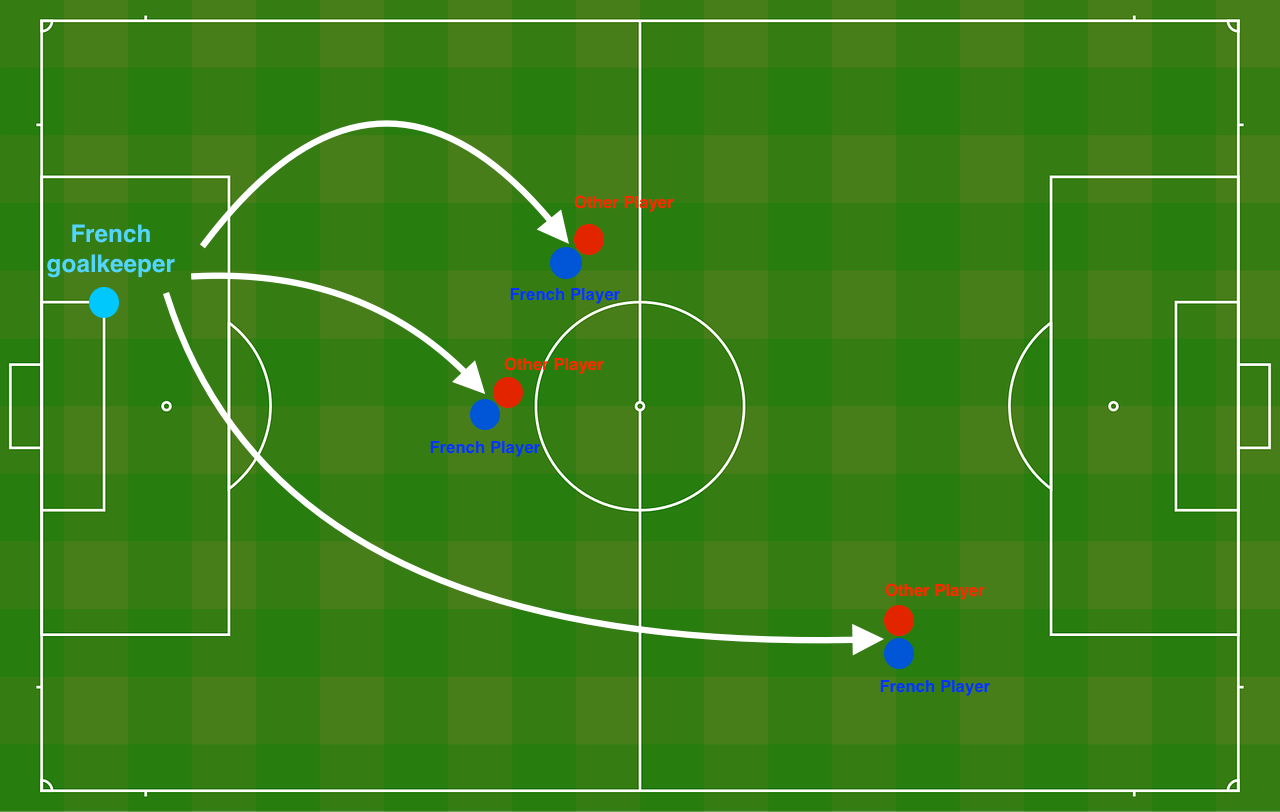

    Figure 1: Football field. The goal keeper kicks the ball in the air, the players of each team are fighting to hit the ball with their head. 
    
    They give you the following 2D dataset from France's past 10 games.

### 3 - Loading the Dataset

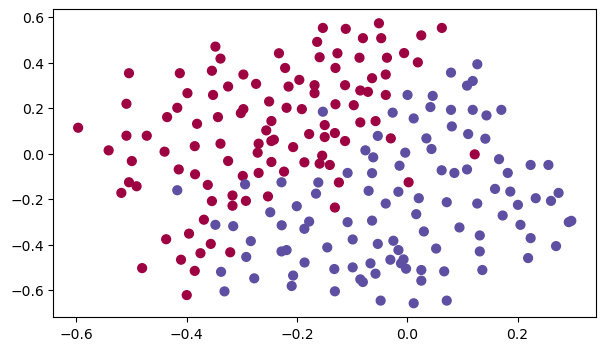

In [6]:
def load_2D_dataset():
    data = scipy.io.loadmat("./data/data.mat")
#     print(data.keys())
    train_X = data["X"].T
    train_Y = data["y"].T
    test_X = data["Xval"].T
    test_Y = data["yval"].T
    
    plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, s=40, cmap=plt.cm.Spectral_r)
    return train_X, train_Y, test_X, test_Y

train_X, train_Y, test_X, test_Y = load_2D_dataset()

    Each dot corresponds to a position on the football field where a football player has hit the ball with his/her head after the French goal keeper has shot the ball from the left side of the football field.

    If the dot is blue, it means the French player managed to hit the ball with his/her head
    If the dot is red, it means the other team's player hit the ball with their head
    
    Your goal: Use a deep learning model to find the positions on the field where the goalkeeper should kick the ball.

    Analysis of the dataset: This dataset is a little noisy, but it looks like a diagonal line separating the upper left half (blue) from the lower right half (red) would work well.

    You will first try a non-regularized model. Then you'll learn how to regularize it and decide which model you will choose to solve the French Football Corporation's problem.


### 4 - Non-Regularized Model
    You will use the following neural network. This model can be used:

        in regularization mode -- by setting the lambd input to a non-zero value. We use "lambd" instead of "lambda" because "lambda" is a reserved keyword in Python.
    
        in dropout mode -- by setting the keep_prob to a value less than one
        
    You will first try the model without any regularization. Then, you will implement:

        L2 regularization -- functions: "compute_cost_with_regularization()" and "backward_propagation_with_regularization()"
        Dropout -- functions: "forward_propagation_with_dropout()" and "backward_propagation_with_dropout()"
    
    In each part, you will run this model with the correct inputs so that it calls the functions you've implemented. Take a look at the code below to familiarize yourself with the model.

In [44]:
def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

def relu(x):
    s = np.maximum(0, x)
    return s

def initialize_parameters_Xavier(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #Xavier
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters

def initialize_parameters_He(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2 / layer_dims[l-1]) #He
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
    return parameters

def forward_propagation(X, parameters): 
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache

def backward_propagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

def update_params(parameters, grads, learning_rate):
    n = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for k in range(n):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
        
    return parameters

def predict(X, y, parameters):
    
    m = X.shape[1]
    p = np.zeros((1, m), dtype = np.int32)
    
    # Forward propagation
    a3, caches = forward_propagation(X, parameters) #without dropout
    
    # convert probas to 0/1 predictions
    for i in range(0, a3.shape[1]):
        if a3[0, i] > 0.5:
            p[0, i] = 1
        else:
            p[0, i] = 0
    print("Accuracy: "  + str(np.mean((p[0, :] == y[0, :]))))
    
    return p

def compute_cost(a3, Y):
    m = Y.shape[1]
    logprobs = np.multiply(-np.log(a3), Y) + np.multiply(-np.log(1 - a3), 1 - Y)
    cost = 1./m * np.nansum(logprobs)
    return cost

def predict_dec(parameters, X):
    # Predict using forward propagation and a classification threshold of 0.5
    a3, cache = forward_propagation(X, parameters) #without dropout
    predictions = (a3 > 0.5).astype("int")
    return predictions

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()

#3 layer network
def model(X, Y, learning_rate=0.3, num_iters=30000, print_cost=True, initialize_params="Xavier", lambd=0, keep_prob=1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar.
    
    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """
    layers_dims = [X.shape[0], 20, 3, 1]
    grads = {}
    costs = []
    if initialize_params == "He":
        params = initialize_parameters_He(layers_dims)
    if initialize_params == "Xavier":
        params = initialize_parameters_Xavier(layers_dims)
        
    for i in range(num_iters):
        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        
        #Dropout
        if keep_prob == 1:
            A3, cache = forward_propagation(X, params)
        elif keep_prob < 1:
            A3, cache = forward_propagation_with_dropout(X, params, keep_prob)
        
        #L2 Regularization for cost function
        if lambd == 0:
            cost = compute_cost(A3, Y)
        else:
            cost = compute_cost_with_regularization(A3, Y, params, lambd)
            
        # Backward propagation
        assert (lambd == 0 or keep_prob == 1)   # it is possible to use both L2 regularization and dropout, 
                                                # but this assignment will only explore one at a time, hence this assert statemnt
        if lambd == 0 and keep_prob == 1:
            #with regularization and dropout
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            #with regularization
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            #with dropout
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
       
        # update params
        params = update_params(params, grads, learning_rate)
        if i%1000 == 0 or i == num_iters-1:
            costs.append(cost)
        if i%10000 == 0 and print_cost:
            print(f"Iteration {i}, Cost: {np.squeeze(cost)}")
            
    #plot the loss
    plt.plot(np.squeeze(costs)) #the curve is shown for dropout case as well, but in mathematical point of view, the costs are not comparable actually for different iteratins with dropout
    plt.xlabel("Iteration per(1000's)")
    plt.ylabel("Costs")
    plt.title(f"Learning rate: {learning_rate}")
    plt.show()
    return params

    Let's train the model without any regularization, and observe the accuracy on the train/test sets.

Iteration 0, Cost: 0.6557412523481002
Iteration 10000, Cost: 0.1632998752572417
Iteration 20000, Cost: 0.138516424232598


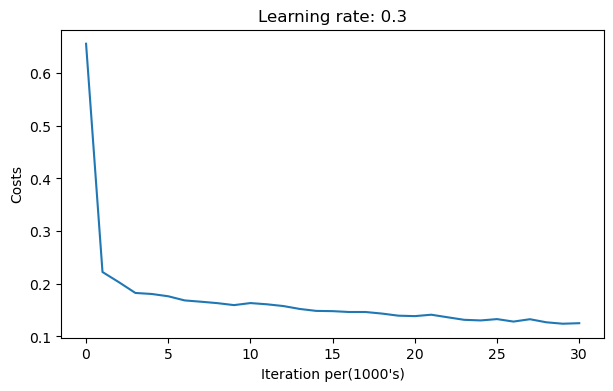

In [18]:
final_params_wo_reg_drop = model(train_X, train_Y)

In [52]:
#Lets visualize weights
print(final_params_wo_reg_drop)

{'W1': array([[ 5.20682883,  3.87642581],
       [ 2.36165023, -6.48302143],
       [-2.43500551, -1.3146437 ],
       [ 1.0868058 , -0.78062984],
       [-2.6711002 , -1.43914761],
       [-5.74377577,  6.03883144],
       [ 0.70328746,  3.77908393],
       [-4.1288873 , -2.2269057 ],
       [-0.93712963, -2.57303947],
       [ 0.89426724, -0.67090946],
       [-7.85243598,  3.74557769],
       [ 2.42194104,  0.71119643],
       [-0.20086883, -0.52805227],
       [ 0.92748803, -0.17795617],
       [-2.78836347,  1.92212368],
       [-1.00191748,  8.09543412],
       [-2.65619646,  0.32415574],
       [-0.71870051, -3.26459461],
       [-2.62110064, -5.2647672 ],
       [ 7.32845399, -5.42040677]]), 'b1': array([[-0.62968926],
       [-0.23851607],
       [-1.23972915],
       [ 0.18320958],
       [-1.36160536],
       [ 0.76932074],
       [-0.21070176],
       [-2.10262844],
       [ 0.14414202],
       [ 0.2616773 ],
       [-0.69713734],
       [ 0.40000121],
       [ 0.02873713],

In [19]:
#Predictions accuracy
print("On training data:")
predictions_train = predict(train_X, train_Y, final_params_wo_reg_drop)
print("On Test data:")
predictions_test = predict(test_X, test_Y, final_params_wo_reg_drop)

On training data:
Accuracy: 0.9478672985781991
On Test data:
Accuracy: 0.915


    The train accuracy is 94.8% while the test accuracy is 91.5%. Lets make it baseline model. 
    
    As this is the baseline model, (you will observe the impact of regularization on this model).
    
    Lets plot the decision boundary of your model.

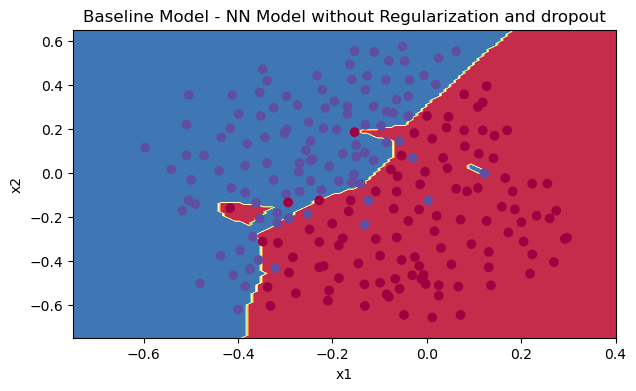

In [27]:
axes = plt.gca()
axes.set_xlim([-0.75, 0.4])
axes.set_ylim([-0.75, 0.65])
plt.title("Baseline Model - NN Model without Regularization and dropout")
plot_decision_boundary(lambda x: predict_dec(final_params_wo_reg_drop, x.T), train_X, train_Y)

    The non-regularized model is obviously overfitting the training set. It is fitting the noisy points! Lets now look at two techniques to reduce overfitting.

#### 5 - L2 Regularization
    The standard way to avoid overfitting is called L2 regularization. It consists of appropriately modifying your cost function, from:
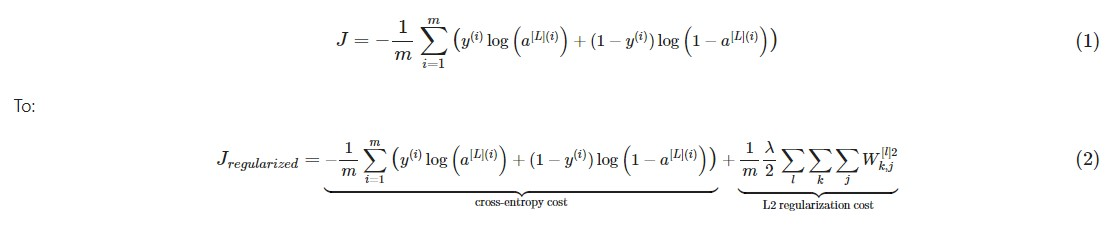

    Let's modify your cost and observe the consequences.


#### Exercise 1 - compute_cost_with_regularization
Implement compute_cost_with_regularization() which computes the cost given by formula (2). To calculate  $Σ_l Σ_k Σ_j {W_{k,j}}^{[l]2}$, use :  np.sum(np.square(Wl))

Note that you have to do this for $W^{[1]}, W^{[2]}$ , and $W^{[3]}$ , then sum the three terms and multiply by $\frac{\lambda}{2m}$.

In [31]:
def compute_cost_with_regularization(A3, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization. See formula (2) above.
    
    Arguments:
    A3 -- post-activation, output of forward propagation, of shape (output size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model
    
    Returns:
    cost - value of the regularized loss function (formula (2))
    """
    m = Y.shape[1]
    W1, W2, W3 = parameters["W1"], parameters["W2"], parameters["W3"]
    
    cross_entropy_cost = compute_cost(A3, Y)
    L2_regularized_cost = (lambd/(2*m)) * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))#observe how we are summing each layers weights.otherwise we also get braodcast isssue 
    final_cost = cross_entropy_cost + L2_regularized_cost
    return final_cost

In [33]:
#test the function
def compute_cost_with_regularization_test_case():
    np.random.seed(1)
    Y_assess = np.array([[1, 1, 0, 1, 0]])
    W1 = np.random.randn(2, 3)
    b1 = np.random.randn(2, 1)
    W2 = np.random.randn(3, 2)
    b2 = np.random.randn(3, 1)
    W3 = np.random.randn(1, 3)
    b3 = np.random.randn(1, 1)
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}
    a3 = np.array([[ 0.40682402,  0.01629284,  0.16722898,  0.10118111,  0.40682402]])
    return a3, Y_assess, parameters

A3, t_Y, parameters = compute_cost_with_regularization_test_case()
cost = compute_cost_with_regularization(A3, t_Y, parameters, lambd=0.1)
print("cost = " + str(cost))

cost = 1.7864859451590758


    Of course, because you changed the cost, you have to change backward propagation as well! All the gradients have to be computed with respect to this new cost.

#### Exercise 2 - backward_propagation_with_regularization
    Implement the changes needed in backward propagation to take into account regularization. The changes only concern dW1, dW2 and dW3. For each, you have to add the regularization term's gradient (d/dW (1/2 λ/m W^2) = λ/m W)

In [88]:
def backward_propagation_with_regularization(X, Y, cache, lambd):
    """
    Implements the backward propagation of our baseline model to which we added an L2 regularization.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation()
    lambd -- regularization hyperparameter, scalar
    
    Returns:
    grads -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3 = cache
    m = Y.shape[1]
    dZ3 = A3 - Y
    dW3 = (1./m) * np.dot(dZ3, A2.T) + np.multiply(lambd/m, W3)    #(l3, l2) = (l3, m) (l2, m)
    db3 = (1./m) * np.sum(dZ3, axis=1, keepdims=True)
    dA2 = np.dot(W3.T, dZ3)                                        #(l2, m) = (l3, l2) (l3, m)
    dZ2 = dA2 * np.where(Z2>0, 1, 0)                              #Z_2 = np.zeros(Z2.shape); Z_2[Z_2>0].astype("int") or np.int64(A2 > 0)
    dW2 = (1./m) * np.dot(dZ2, A1.T) + (lambd/m) * W2
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * np.where(Z1>0, 1, 0)  
    dW1 = (1./m) * np.dot(dZ1, X.T) + (lambd/m) * W1
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        "dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
        "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
        "dZ1": dZ1, "dW1": dW1, "db1": db1
    }
    return grads
    
#     dZ3 = A3 - Y
#     dW3 = 1./m * np.dot(dZ3, A2.T) + lambd*W3/m
#     db3 = 1. / m * np.sum(dZ3, axis=1, keepdims=True)
#     dA2 = np.dot(W3.T, dZ3)
#     dZ2 = np.multiply(dA2, np.int64(A2 > 0))
#     dW2 = 1./m * np.dot(dZ2, A1.T) + lambd*W2/m
#     db2 = 1. / m * np.sum(dZ2, axis=1, keepdims=True) 
#     dA1 = np.dot(W2.T, dZ2)
#     dZ1 = np.multiply(dA1, np.int64(A1 > 0))
#     dW1 = 1./m * np.dot(dZ1, X.T) +lambd*W1/m
#     db1 = 1. / m * np.sum(dZ1, axis=1, keepdims=True)

In [42]:
#Test the function
def backward_propagation_with_regularization_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(3, 5)
    Y_assess = np.array([[1, 1, 0, 1, 0]])
    cache = (np.array([[-1.52855314,  3.32524635,  2.13994541,  2.60700654, -0.75942115],
         [-1.98043538,  4.1600994 ,  0.79051021,  1.46493512, -0.45506242]]),
  np.array([[ 0.        ,  3.32524635,  2.13994541,  2.60700654,  0.        ],
         [ 0.        ,  4.1600994 ,  0.79051021,  1.46493512,  0.        ]]),
  np.array([[-1.09989127, -0.17242821, -0.87785842],
         [ 0.04221375,  0.58281521, -1.10061918]]),
  np.array([[ 1.14472371],
         [ 0.90159072]]),
  np.array([[ 0.53035547,  5.94892323,  2.31780174,  3.16005701,  0.53035547],
         [-0.69166075, -3.47645987, -2.25194702, -2.65416996, -0.69166075],
         [-0.39675353, -4.62285846, -2.61101729, -3.22874921, -0.39675353]]),
  np.array([[ 0.53035547,  5.94892323,  2.31780174,  3.16005701,  0.53035547],
         [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]]),
  np.array([[ 0.50249434,  0.90085595],
         [-0.68372786, -0.12289023],
         [-0.93576943, -0.26788808]]),
  np.array([[ 0.53035547],
         [-0.69166075],
         [-0.39675353]]),
  np.array([[-0.3771104 , -4.10060224, -1.60539468, -2.18416951, -0.3771104 ]]),
  np.array([[ 0.40682402,  0.01629284,  0.16722898,  0.10118111,  0.40682402]]),
  np.array([[-0.6871727 , -0.84520564, -0.67124613]]),
  np.array([[-0.0126646]]))
    return X_assess, Y_assess, cache

t_X, t_Y, cache = backward_propagation_with_regularization_test_case()

grads = backward_propagation_with_regularization(t_X, t_Y, cache, lambd = 0.7)
print ("dW1 = \n"+ str(grads["dW1"]))
print ("dW2 = \n"+ str(grads["dW2"]))
print ("dW3 = \n"+ str(grads["dW3"]))

dW1 = 
[[-0.25604646  0.12298827 -0.28297129]
 [-0.17706303  0.34536094 -0.4410571 ]]
dW2 = 
[[ 0.79276486  0.85133918]
 [-0.0957219  -0.01720463]
 [-0.13100772 -0.03750433]]
dW3 = 
[[-1.77691347 -0.11832879 -0.09397446]]


    Let's now run the model with L2 regularization (lambda=0.7). The model() function will call:

        - compute_cost_with_regularization instead of compute_cost
        - backward_propagation_with_regularization instead of backward_propagation

Iteration 0, Cost: 0.6974484493131264
Iteration 10000, Cost: 0.2684918873282238
Iteration 20000, Cost: 0.2680916337127301


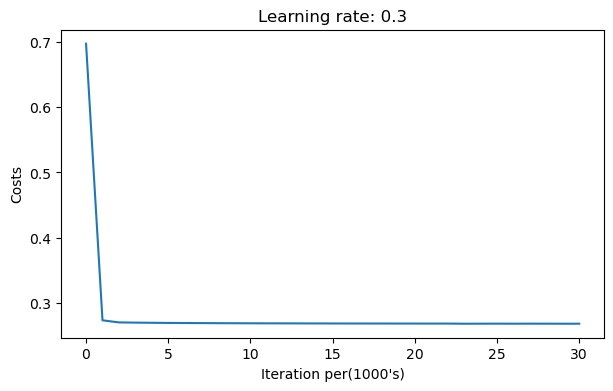

On the train set:
Accuracy: 0.9383886255924171
On the test set:
Accuracy: 0.93


In [54]:
#Training with Regularization
final_params_regularization = model(train_X, train_Y, lambd = 0.7)

#Predictions accuracy
print ("On the train set:")
predictions_train = predict(train_X, train_Y, final_params_regularization)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, final_params_regularization)

    Congrats, the test set accuracy increased to 93%. You have saved the French football team!
    
     Also, observe even the train accuracy decreased, it is still close to baseline performance. We are good until the test accuracy is increasing

    You are not overfitting the training data anymore. Let's plot the decision boundary.

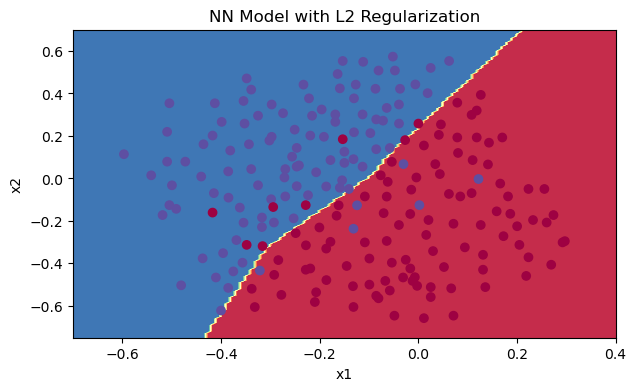

In [50]:
axes = plt.gca()
axes.set_xlim([-0.7, 0.4])
axes.set_ylim([-0.75, 0.7])
plt.title("NN Model with L2 Regularization")
plot_decision_boundary(lambda x: predict_dec(final_params_regularization, x.T), train_X, train_Y)

In [51]:
#Lets see the weights
print(final_params_regularization)
#observe how weights are smaller compared to non regularized model

{'W1': array([[ 0.49404783,  0.45503767],
       [ 0.30126024, -0.22779142],
       [-0.5708403 , -0.41113358],
       [ 0.30620362, -0.23208088],
       [-0.54462434, -0.39225453],
       [-0.48148493,  0.36652103],
       [-0.35092534,  0.43492286],
       [-0.80959047, -0.58265045],
       [-0.1261421 , -0.46078831],
       [ 0.59881995, -0.45386346],
       [-0.53037219,  0.40373706],
       [ 0.32980439,  0.30383147],
       [-0.29541537,  0.22589651],
       [ 0.28782584, -0.21771158],
       [-0.30613539,  0.2350285 ],
       [-0.55303108,  0.68759136],
       [-0.29169528,  0.22346362],
       [-0.17358079, -0.63353155],
       [-0.02407338, -0.04057394],
       [ 1.80268291, -0.61350483]]), 'b1': array([[ 0.06011804],
       [ 0.24614831],
       [-0.30641449],
       [ 0.21031209],
       [-0.29219749],
       [ 0.2142676 ],
       [-0.07600518],
       [-0.43365468],
       [ 0.01474865],
       [ 0.4112902 ],
       [ 0.23608659],
       [ 0.03946558],
       [ 0.14312368],

Iteration 0, Cost: 1.5494669015986628
Iteration 10000, Cost: 0.6882204032480794
Iteration 20000, Cost: 0.6882204032480794


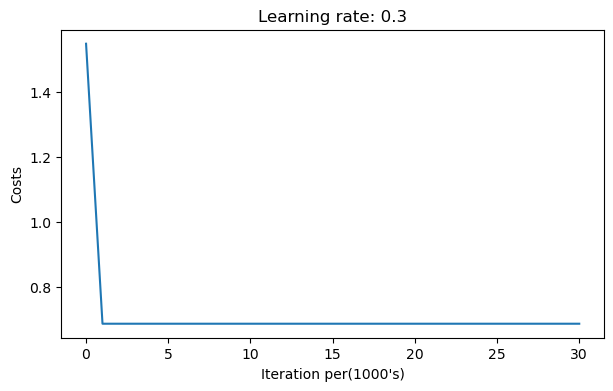

On the train set:
Accuracy: 0.8672985781990521
On the test set:
Accuracy: 0.885


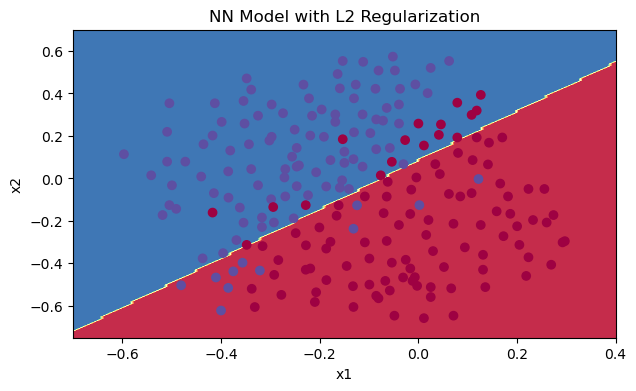

In [60]:
#Lets see how decision boundary looks like when we increase the lambd to very high number. It should lead to underfitting model and leads to oversmooth boundary
#Training with Regularization
final_params_high_regularization = model(train_X, train_Y, lambd = 15)

#Predictions accuracy
print ("On the train set:")
predictions_train = predict(train_X, train_Y, final_params_high_regularization)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, final_params_high_regularization)
axes = plt.gca()
axes.set_xlim([-0.7, 0.4])
axes.set_ylim([-0.75, 0.7])
plt.title("NN Model with L2 Regularization")
plot_decision_boundary(lambda x: predict_dec(final_params_high_regularization, x.T), train_X, train_Y)

#### Observations:

    - The value of λ is a hyperparameter that you can tune using a dev set.
    - L2 regularization makes your decision boundary smoother. If λ is too large, it is also possible to "oversmooth", resulting in a model with high bias.

**What is L2-regularization actually doing?:**
    
    L2-regularization relies on the assumption that a model with small weights is simpler than a model with large weights. Thus, by penalizing the square values of the weights in the cost function you drive all the weights to smaller values. It becomes too costly for the cost to have large weights! This leads to a smoother model in which the output changes more slowly as the input changes.

**What you should remember: the implications of L2-regularization on:**

- The cost computation:
    - A regularization term is added to the cost.
- The backpropagation function:
    - There are extra terms in the gradients with respect to weight matrices.
- Weights end up smaller ("weight decay"):
    - Weights are pushed to smaller values.

### 6 - Dropout
    Finally, dropout is a widely used regularization technique that is specific to deep learning. It randomly shuts down(knocks off) some neurons in each iteration.


    For eg, if we want Drop-out on the second hidden layer, At each iteration, you shut down (= set to zero) each neuron of a layer with probability (1-keep_prob) or keep it with probability (keep_prob). The dropped neurons don't contribute to the training in both the forward and backward propagations of the iteration.

    Another eg, where Drop-out on the first and third hidden layers.
     1st layer: lets shut down on average 40% of the neurons. (keep_prob = 0.6) (drop out prob = 0.4)
     3rd layer: lets shut down on average 20% of the neurons. (keep_prob = 0.8)(drop out prob = 0.2)

    When you shut some neurons down, you actually modify your model. The idea behind drop-out is that at each iteration, you train a different model that uses only a subset of your neurons. With dropout, your neurons thus become less sensitive to the activation of one other specific neuron, because that other neuron might be shut down at any time.(weight spreads across the neurons)

#### 6.1 - Forward Propagation with Dropout

##### Exercise 3 - forward_propagation_with_dropout
    Implement the forward propagation with dropout. You are using a 3 layer neural network, and will add dropout to the first and second hidden layers. We will not apply dropout to the input layer or output layer.

    Instructions: You would like to shut down some neurons in the first and second layers. To do that, you are going to carry out 4 Steps:

1. In lecture, we dicussed creating a variable $d^{[1]}$ with the same shape as $A^{[1]}$ using np.random.rand() (uniform distribution) to randomly get numbers between 0 and 1. Here, you will use a vectorized implementation, so create a random matrix 
$D^{[1]} = [d^{[1](1)}, d^{[1](2)},..,d^{[1](m)}]$ of the same dimension as $A^{[1]}$.

2. Set each entry of $D^{[1]}$ to be 1 with probability (keep_prob), and 0 otherwise.
    
       Hint: Let's say that keep_prob = 0.8, which means that we want to keep about 80% of the neurons and drop out about 20% of them. We want to generate a vector that has 1's and 0's, where about 80% of them are 1 and about 20% are 0. This python statement:
     
         X = (X < keep_prob).astype(int) is conceptually the same as this if-else statement (for the simple case of a one-dimensional array) :

                for i, v in enumerate(x):
                    if v < keep_prob:
                        x[i] = 1
                    else: #v >= keep_prob
                        x[i] = 0
    
        Note that the X = (X < keep_prob).astype(int) works with multi-dimensional arrays, and the resulting output preserves the dimensions of the input array.

        Also note that, without using .astype(int), the result is an array of booleans True and False, which Python automatically converts to 1 and 0 if we multiply it with numbers. (However, it's better practice to convert data into the data type that we intend, so try using .astype(int).)

3. Set $A^{[1]}$ to $A^{[1]} * D^{[1]}$. (You are shutting down some neurons). You can think of $D^{[1]}$ as a mask, so that when it is multiplied with another matrix, it shuts down some of the values.

4. Divide $A^{[1]}$ by keep_prob. By doing this you are assuring that the result of the cost will still have the same expected value as without drop-out. (This technique is also called inverted dropout.)

In [70]:
def forward_propagation_with_dropout(X, params, keep_prob=0.5):
    """
    Implements the forward propagation: LINEAR -> RELU + DROPOUT -> LINEAR -> RELU + DROPOUT -> LINEAR -> SIGMOID.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape (20, 2)
                    b1 -- bias vector of shape (20, 1)
                    W2 -- weight matrix of shape (3, 20)
                    b2 -- bias vector of shape (3, 1)
                    W3 -- weight matrix of shape (1, 3)
                    b3 -- bias vector of shape (1, 1)
    keep_prob - probability of keeping a neuron active during drop-out, scalar
    
    Returns:
    A3 -- last activation value, output of the forward propagation, of shape (1,1)
    cache -- tuple, information stored for computing the backward propagation
    """
    np.random.seed(1)
    W1, b1, W2, b2, W3, b3 = params.values()
    
    #First layer
    Z1 = np.dot(W1, X) + b1                          #(l1, m) = (l1, l0) (l0, m) + (l1, 1)
    A1 = relu(Z1)
    #dropout layer
    D1 = np.random.rand(A1.shape[0], A1.shape[1]) 
    D1 = (D1 < keep_prob).astype(int)
    A1 = np.multiply(A1, D1)
    A1 /= keep_prob #inverted dropout
    
    #Second layer
    Z2 = np.dot(W2, A1) + b2                         #(l2, m) = (l2, l1) (l1, m) + (l2, 1) same size but few neurons will be zero
    A2 = relu(Z2)
    #Dropoutlayer
    D2 = np.random.rand(A2.shape[0], A2.shape[1]) 
    D2 = (D2 < keep_prob).astype(int)
    A2 = A2 * D2
    A2 /= keep_prob #inverted dropout
    
    #Output Layer
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) #cache D vector while caching Z during activation calculation
    return A3, cache

In [71]:
#test the function
def forward_propagation_with_dropout_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(3, 5)
    W1 = np.random.randn(2, 3)
    b1 = np.random.randn(2, 1)
    W2 = np.random.randn(3, 2)
    b2 = np.random.randn(3, 1)
    W3 = np.random.randn(1, 3)
    b3 = np.random.randn(1, 1)
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}
    
    return X_assess, parameters

t_X, parameters = forward_propagation_with_dropout_test_case()

A3, cache = forward_propagation_with_dropout(t_X, parameters, keep_prob=0.7)

print ("A3 = " + str(A3))

A3 = [[0.36974721 0.00305176 0.04565099 0.49683389 0.36974721]]


#### 6.2 - Backward Propagation with Dropout

##### Exercise 4 - backward_propagation_with_dropout

Implement the backward propagation with dropout. As before, you are training a 3 layer network. Add dropout to the first and second hidden layers, using the masks $D^{[1]}$ and $D^{[2]}$ stored in the cache.

**Instruction: Backpropagation with dropout is actually quite easy. You will have to carry out 2 Steps:**

- You had previously shut down some neurons during forward propagation, by applying a mask $D^{[1]}$ to A1. In backpropagation, you will have to shut down the same neurons, by reapplying the same mask to dA1.

- During forward propagation, you had divided $A^{[1]}$ by keep_prob. In backpropagation, you'll therefore have to divide dA1 by keep_prob again (the calculus interpretation is that if $A^{[1]}$ is scaled by keep_prob, then its derivative $dA^{[1]}$ is also scaled by the same keep_prob)

In [76]:
def backward_propagation_with_dropout(X, Y, cache, keep_prob):
    Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3 = cache
    m = Y.shape[1]
    dZ3 = A3 - Y
    dW3 = (1./m) * np.dot(dZ3, A2.T)                               #(l3, l2) = (l3, m) (l2, m)
    db3 = (1./m) * np.sum(dZ3, axis=1, keepdims=True)
    dA2 = np.dot(W3.T, dZ3)                                        #(l2, m) = (l3, l2) (l3, m)
    #dropout handling 
    dA2 = dA2 * D2                                                  #applying mask applied to A2 to dA2 as well
    dA2 = dA2 / keep_prob                                           #scaling just like A2
    
    dZ2 = dA2 * (A2>0).astype(int)                              
    dW2 = (1./m) * np.dot(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    #dropout handling 
    dA1 *= D1                                                  #applying mask applied to A1 to dA1 as well
    dA1 /= keep_prob                                           #scaling just like A1
    
    dZ1 = dA1 * np.where(Z1>0, 1, 0)                              #np.where(Z1>0, 1, 0) same as (A1>0).astype(int) think in perspective of relu. make sense then
    dW1 = (1./m) * np.dot(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        "dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
        "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
        "dZ1": dZ1, "dW1": dW1, "db1": db1
    }
    return grads

In [77]:
def backward_propagation_with_dropout_test_case():
    np.random.seed(1)
    X_assess = np.random.randn(3, 5)
    Y_assess = np.array([[1, 1, 0, 1, 0]])
    cache = (np.array([[-1.52855314,  3.32524635,  2.13994541,  2.60700654, -0.75942115],
           [-1.98043538,  4.1600994 ,  0.79051021,  1.46493512, -0.45506242]]), np.array([[ True, False,  True,  True,  True],
           [ True,  True,  True,  True, False]], dtype=bool), np.array([[ 0.        ,  0.        ,  4.27989081,  5.21401307,  0.        ],
           [ 0.        ,  8.32019881,  1.58102041,  2.92987024,  0.        ]]), np.array([[-1.09989127, -0.17242821, -0.87785842],
           [ 0.04221375,  0.58281521, -1.10061918]]), np.array([[ 1.14472371],
           [ 0.90159072]]), np.array([[ 0.53035547,  8.02565606,  4.10524802,  5.78975856,  0.53035547],
           [-0.69166075, -1.71413186, -3.81223329, -4.61667916, -0.69166075],
           [-0.39675353, -2.62563561, -4.82528105, -6.0607449 , -0.39675353]]), np.array([[ True, False,  True, False,  True],
           [False,  True, False,  True,  True],
           [False, False,  True, False, False]], dtype=bool), np.array([[ 1.06071093,  0.        ,  8.21049603,  0.        ,  1.06071093],
           [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
           [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]]), np.array([[ 0.50249434,  0.90085595],
           [-0.68372786, -0.12289023],
           [-0.93576943, -0.26788808]]), np.array([[ 0.53035547],
           [-0.69166075],
           [-0.39675353]]), np.array([[-0.7415562 , -0.0126646 , -5.65469333, -0.0126646 , -0.7415562 ]]), np.array([[ 0.32266394,  0.49683389,  0.00348883,  0.49683389,  0.32266394]]), np.array([[-0.6871727 , -0.84520564, -0.67124613]]), np.array([[-0.0126646]]))


    return X_assess, Y_assess, cache

t_X, t_Y, cache = backward_propagation_with_dropout_test_case()

gradients = backward_propagation_with_dropout(t_X, t_Y, cache, keep_prob=0.8)

print ("dA1 = \n" + str(gradients["dA1"]))
print ("dA2 = \n" + str(gradients["dA2"]))

dA1 = 
[[ 0.36544439  0.         -0.00188233  0.         -0.17408748]
 [ 0.65515713  0.         -0.00337459  0.         -0.        ]]
dA2 = 
[[ 0.58180856  0.         -0.00299679  0.         -0.27715731]
 [ 0.          0.53159854 -0.          0.53159854 -0.34089673]
 [ 0.          0.         -0.00292733  0.         -0.        ]]


    Let's now run the model with dropout (keep_prob = 0.86). It means at every iteration you shut down each neurons of layer 1 and 2 with 14% probability. i.e if layer 1 has 20 neurons, then 1.4*2 = 2.8 = 3 neurons will shut down on average. Each neurons has 14% chance of being shutdown. 
    
    The function model() will now call:
        forward_propagation_with_dropout instead of forward_propagation.
        backward_propagation_with_dropout instead of backward_propagation.

Iteration 0, Cost: 0.6543912405149825


C:\Users\malla\AppData\Local\Temp\ipykernel_8672\608416248.py:111: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3), Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\malla\AppData\Local\Temp\ipykernel_8672\608416248.py:111: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3), Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Iteration 10000, Cost: 0.0610169865749056
Iteration 20000, Cost: 0.060582435798513114


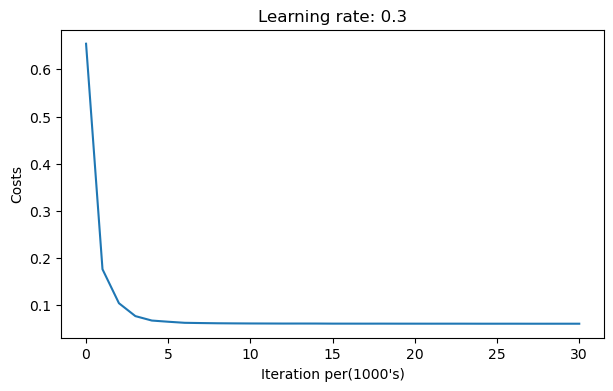

On the train set:
Accuracy: 0.9289099526066351
On the test set:
Accuracy: 0.95


In [78]:
final_params_dropout = model(train_X, train_Y, keep_prob = 0.86, learning_rate = 0.3)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, final_params_dropout) #usual forward prop withouth dropout during test time
print ("On the test set:")
predictions_test = predict(test_X, test_Y, final_params_dropout)

    Dropout works great! The test accuracy has increased again (to 95%)! Your model is not overfitting the training set and does a great job on the test set. The French football team will be forever grateful to you!
    
    Note: As said in the lecture, this learning curve is not actually comparable, cuz with dropout, we usually learn different architectures for every iteration. so each cost function per iteration is different. Mathematically they are not apples to apples, to plot the learning curve, but here we are anyway doing it as if they are comparable.

In [79]:
#Lets look at params
print(final_params_dropout)

{'W1': array([[ 2.96831031, -0.18975926],
       [ 0.55542767, -1.44655206],
       [-0.52970822,  2.24880148],
       [ 1.07254221, -1.02225827],
       [-1.34704129, -1.03036598],
       [-1.39764737,  0.94335813],
       [ 1.63328853,  2.48363642],
       [-0.92995921, -0.80517241],
       [ 0.1654942 , -1.94519272],
       [ 1.94777878, -0.12800724],
       [-0.72857212,  1.64016862],
       [ 1.59376707,  2.97873228],
       [-0.71489588,  2.0075749 ],
       [-0.83821025, -1.97152979],
       [-0.96895108,  0.55140548],
       [ 0.82393809,  3.22480979],
       [-2.669287  , -0.44290853],
       [-0.52914883, -3.40956379],
       [-2.35840007, -1.15624481],
       [ 3.89689492, -2.19713955]]), 'b1': array([[ 0.3438024 ],
       [ 1.42911892],
       [ 0.60969729],
       [-0.13548232],
       [-0.67980798],
       [ 0.8758604 ],
       [-0.21254358],
       [-0.57345067],
       [ 0.12488797],
       [ 1.31730122],
       [-0.414463  ],
       [ 0.27443015],
       [ 1.10802733],

Run the code below to plot the decision boundary.

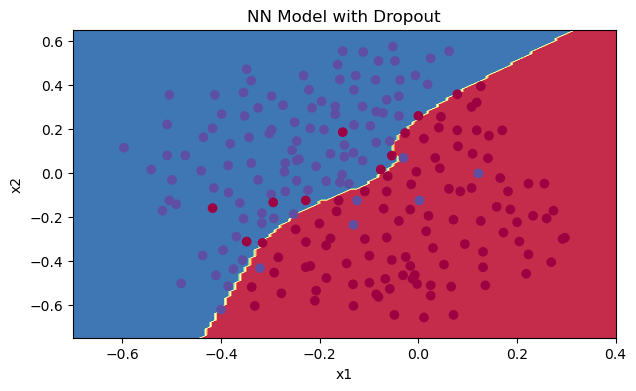

In [84]:
axes = plt.gca()
axes.set_xlim([-0.70, 0.4])
axes.set_ylim([-0.75, 0.65])
plt.title("NN Model with Dropout")
plot_decision_boundary(lambda x: predict_dec(final_params_dropout, x.T), train_X, train_Y)

#### Note:

    A common mistake when using dropout is to use it both in training and testing. You should use dropout (randomly eliminate nodes) only in training as we are already accounting for lost expected activations using inverted dropout.

    Deep learning frameworks like TensorFlow, PaddlePaddle, Keras or caffe come with a dropout layer implementation. Don't stress - you will soon learn some of these frameworks.

**What you should remember about dropout:**

- Dropout is a regularization technique.
- You only use dropout during training. Don't use dropout (randomly eliminate nodes) during test time.
- Apply dropout both during forward and backward propagation.
- During training time, divide each dropout layer by keep_prob to keep the same expected value for the activations. 
     - For example, if keep_prob is 0.5, then we will on average shut down half the nodes, so the output will be scaled by 0.5 since only the remaining half are contributing to the solution. Dividing by 0.5 is equivalent to multiplying by 2 as 0.5 is 1/2. Hence, the output now has the same expected value. You can check that this works even when keep_prob is other values than 0.5.

### 7 - Conclusions
     Here are the results of our three models:

                model	                          train accuracy	test accuracy
                3-layer NN without regularization	   95%	               91.5%
                3-layer NN with L2-regularization	   94%	               93%
                3-layer NN with dropout	           93%	               95%

    Note that regularization hurts training set performance! This is because it limits the ability of the network to overfit to the training set. But since it ultimately gives better test accuracy, it is helping your system.

    Congratulations for finishing this assignment! And also for revolutionizing French football. :-)

    What we want you to remember from this notebook:

        - Regularization will help you reduce overfitting.
        - Regularization will drive your weights to lower values.
        - L2 regularization and Dropout are two very effective regularization techniques.

In [85]:
#Test Cases
def datatype_check(expected_output, target_output, error):
    success = 0
    if isinstance(target_output, dict):
        for key in expected_output.keys():
            try:
                success += datatype_check(expected_output[key], 
                                         target_output[key], error)
            except:
                print("Error: {} in variable {}. Got {} but expected type {}".format(error,
                                                                          key, type(target_output[key]), type(expected_output[key])))
        if success == len(target_output.keys()):
            return 1
        else:
            return 0
    elif isinstance(target_output, tuple) or isinstance(target_output, list):
        for i in range(len(expected_output)):
            try: 
                success += datatype_check(expected_output[i], 
                                         target_output[i], error)
            except:
                print("Error: {} in variable {}. Got type: {}  but expected type {}".format(error,
                                                                          i, type(target_output[i]), type(expected_output[i])))
        if success == len(target_output):
            return 1
        else:
            return 0
                
    else:
        assert isinstance(target_output, type(expected_output))
        return 1
            
def equation_output_check(expected_output, target_output, error):
    success = 0
    if isinstance(expected_output, dict):
        for key in expected_output.keys():
            try:
                success += equation_output_check(expected_output[key], 
                                         target_output[key], error)
            except:
                print("Error: {} for variable {}.".format(error,
                                                                          key))
        if success == len(target_output.keys()):
            return 1
        else:
            return 0
    elif isinstance(expected_output, tuple) or isinstance(expected_output, list):
        for i in range(len(expected_output)):
            try: 
                success += equation_output_check(expected_output[i], 
                                         target_output[i], error)
            except:
                print("Error: {} for variable {}.".format(error, i))
        if success == len(target_output):
            return 1
        else:
            return 0
                
    else:
        if hasattr(expected_output, 'shape'):
            #np.allclose(target_output, expected_output)
            np.testing.assert_array_almost_equal(target_output, expected_output)
        else:
            assert target_output == expected_output
        return 1
    
def shape_check(expected_output, target_output, error):
    success = 0
    if isinstance(expected_output, dict):
        for key in expected_output.keys():
            try:
                success += shape_check(expected_output[key], 
                                         target_output[key], error)
            except:
                print("Error: {} for variable {}.".format(error, key))
        if success == len(expected_output.keys()):
            return 1
        else:
            return 0
    elif isinstance(expected_output, tuple) or isinstance(expected_output, list):
        for i in range(len(expected_output)):
            try: 
                success += shape_check(expected_output[i], 
                                         target_output[i], error)
            except:
                print("Error: {} for variable {}.".format(error, i))
        if success == len(expected_output):
            return 1
        else:
            return 0
                
    else:
        if hasattr(expected_output, 'shape'):
            assert target_output.shape == expected_output.shape
        return 1

def single_test(test_cases, target):
    success = 0
    for test_case in test_cases:
        try:
            if test_case['name'] == "datatype_check":
                assert isinstance(target(*test_case['input']),
                                  type(test_case["expected"]))
                success += 1
            if test_case['name'] == "equation_output_check":
                assert np.allclose(test_case["expected"],
                                   target(*test_case['input']))
                success += 1
            if test_case['name'] == "shape_check":
                assert test_case['expected'].shape == target(*test_case['input']).shape
                success += 1
        except:
            print("Error: " + test_case['error'])
            
    if success == len(test_cases):
        print("\033[92m All tests passed.")
    else:
        print('\033[92m', success," Tests passed")
        print('\033[91m', len(test_cases) - success, " Tests failed")
        raise AssertionError("Not all tests were passed for {}. Check your equations and avoid using global variables inside the function.".format(target.__name__))

def multiple_test(test_cases, target):
    success = 0
    for test_case in test_cases:
        try:
            target_answer = target(*test_case['input'])                   
            if test_case['name'] == "datatype_check":
                success += datatype_check(test_case['expected'], target_answer, test_case['error'])
            if test_case['name'] == "equation_output_check":
                success += equation_output_check(test_case['expected'], target_answer, test_case['error'])
            if test_case['name'] == "shape_check":
                success += shape_check(test_case['expected'], target_answer, test_case['error'])
        except:
            print("Error: " + test_case['error'])
            
    if success == len(test_cases):
        print("\033[92m All tests passed.")
    else:
        print('\033[92m', success," Tests passed")
        print('\033[91m', len(test_cases) - success, " Tests failed")
        raise AssertionError("Not all tests were passed for {}. Check your equations and avoid using global variables inside the function.".format(target.__name__))

In [86]:
#Unit Tests
def compute_cost_with_regularization_test(target):
    np.random.seed(1)
    Y = np.array([[1, 1, 0, 1, 0]])
    W1 = np.random.randn(2, 3)
    b1 = np.random.randn(2, 1)
    W2 = np.random.randn(3, 2)
    b2 = np.random.randn(3, 1)
    W3 = np.random.randn(1, 3)
    b3 = np.random.randn(1, 1)
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}
    A3 = np.array([[ 0.40682402,  0.01629284,  0.16722898,  0.10118111,  0.40682402]])
    lambd = 0.1
    expected_output = np.float64(1.7864859451590758)
    test_cases = [
        {
            "name": "shape_check",
            "input": [A3, Y, parameters, lambd],
            "expected": expected_output,
            "error": "Wrong shape"
        },
        {
            "name": "equation_output_check",
            "input": [A3, Y, parameters, lambd],
            "expected": expected_output,
            "error": "Wrong output"
        }
    ]
    
    single_test(test_cases, target)
    
compute_cost_with_regularization_test(compute_cost_with_regularization)

 All tests passed.


In [89]:
def backward_propagation_with_regularization_test(target):
    np.random.seed(1)
    X = np.random.randn(3, 5)
    Y = np.array([[1, 1, 0, 1, 0]])
    cache = (np.array([[-1.52855314,  3.32524635,  2.13994541,  2.60700654, -0.75942115],
         [-1.98043538,  4.1600994 ,  0.79051021,  1.46493512, -0.45506242]]),
  np.array([[ 0.        ,  3.32524635,  2.13994541,  2.60700654,  0.        ],
         [ 0.        ,  4.1600994 ,  0.79051021,  1.46493512,  0.        ]]),
  np.array([[-1.09989127, -0.17242821, -0.87785842],
         [ 0.04221375,  0.58281521, -1.10061918]]),
  np.array([[ 1.14472371],
         [ 0.90159072]]),
  np.array([[ 0.53035547,  5.94892323,  2.31780174,  3.16005701,  0.53035547],
         [-0.69166075, -3.47645987, -2.25194702, -2.65416996, -0.69166075],
         [-0.39675353, -4.62285846, -2.61101729, -3.22874921, -0.39675353]]),
  np.array([[ 0.53035547,  5.94892323,  2.31780174,  3.16005701,  0.53035547],
         [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]]),
  np.array([[ 0.50249434,  0.90085595],
         [-0.68372786, -0.12289023],
         [-0.93576943, -0.26788808]]),
  np.array([[ 0.53035547],
         [-0.69166075],
         [-0.39675353]]),
  np.array([[-0.3771104 , -4.10060224, -1.60539468, -2.18416951, -0.3771104 ]]),
  np.array([[ 0.40682402,  0.01629284,  0.16722898,  0.10118111,  0.40682402]]),
  np.array([[-0.6871727 , -0.84520564, -0.67124613]]),
  np.array([[-0.0126646]]))
    lambd = 0.7
    
    expected_output = {'dZ3': np.array([[-0.59317598, -0.98370716,  0.16722898, -0.89881889,  0.40682402]]),
 'dW3': np.array([[-1.77691347, -0.11832879, -0.09397446]]),
 'db3': np.array([[-0.38032981]]),
 'dA2': np.array([[ 0.40761434,  0.67597671, -0.11491519,  0.6176438 , -0.27955836],
        [ 0.50135568,  0.83143484, -0.14134288,  0.7596868 , -0.34384996],
        [ 0.39816708,  0.66030962, -0.11225181,  0.6033287 , -0.27307905]]),
 'dZ2': np.array([[ 0.40761434,  0.67597671, -0.11491519,  0.6176438 , -0.27955836],
        [ 0.        ,  0.        , -0.        ,  0.        , -0.        ],
        [ 0.        ,  0.        , -0.        ,  0.        , -0.        ]]),
 'dW2': np.array([[ 0.79276486,  0.85133918],
        [-0.0957219 , -0.01720463],
        [-0.13100772, -0.03750433]]),
 'db2': np.array([[0.26135226],
        [0.        ],
        [0.        ]]),
 'dA1': np.array([[ 0.2048239 ,  0.33967447, -0.05774423,  0.31036252, -0.14047649],
        [ 0.3672018 ,  0.60895764, -0.10352203,  0.5564081 , -0.25184181]]),
 'dZ1': np.array([[ 0.        ,  0.33967447, -0.05774423,  0.31036252, -0.        ],
        [ 0.        ,  0.60895764, -0.10352203,  0.5564081 , -0.        ]]),
 'dW1': np.array([[-0.25604646,  0.12298827, -0.28297129],
        [-0.17706303,  0.34536094, -0.4410571 ]]),
 'db1': np.array([[0.11845855],
        [0.21236874]])}
    test_cases = [
        {
            "name": "shape_check",
            "input": [X, Y, cache, lambd],
            "expected": expected_output,
            "error": "Wrong shape"
        },
        {
            "name": "equation_output_check",
            "input": [X, Y, cache, lambd],
            "expected": expected_output,
            "error": "Wrong output"
        }
    ]
    
    multiple_test(test_cases, target)
    
backward_propagation_with_regularization_test(backward_propagation_with_regularization)

 All tests passed.


In [90]:
def forward_propagation_with_dropout_test(target):
    np.random.seed(1)
    X = np.random.randn(3, 5)
    W1 = np.random.randn(2, 3)
    b1 = np.random.randn(2, 1)
    W2 = np.random.randn(3, 2)
    b2 = np.random.randn(3, 1)
    W3 = np.random.randn(1, 3)
    b3 = np.random.randn(1, 1)
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}
    
    A3 = np.array([[0.36974721, 0.00305176, 0.04565099, 0.49683389, 0.36974721]])
    cache = (np.array([[-1.52855314,  3.32524635,  2.13994541,  2.60700654, -0.75942115],
        [-1.98043538,  4.1600994 ,  0.79051021,  1.46493512, -0.45506242]]),
 np.array([[ True, False,  True,  True,  True],
        [ True,  True,  True,  True,  True]]),
 np.array([[0.        , 0.        , 3.05706487, 3.72429505, 0.        ],
        [0.        , 5.94299915, 1.1293003 , 2.09276446, 0.        ]]),
 np.array([[-1.09989127, -0.17242821, -0.87785842],
        [ 0.04221375,  0.58281521, -1.10061918]]),
 np.array([[1.14472371],
        [0.90159072]]),
 np.array([[ 0.53035547,  5.88414161,  3.08385015,  4.28707196,  0.53035547],
        [-0.69166075, -1.42199726, -2.92064114, -3.49524533, -0.69166075],
        [-0.39675353, -1.98881216, -3.55998747, -4.44246165, -0.39675353]]),
 np.array([[ True,  True,  True, False,  True],
        [ True,  True,  True,  True,  True],
        [False, False,  True,  True, False]]),
 np.array([[0.75765067, 8.40591658, 4.40550021, 0.        , 0.75765067],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]),
 np.array([[ 0.50249434,  0.90085595],
        [-0.68372786, -0.12289023],
        [-0.93576943, -0.26788808]]),
 np.array([[ 0.53035547],
        [-0.69166075],
        [-0.39675353]]),
 np.array([[-0.53330145, -5.78898099, -3.04000407, -0.0126646 , -0.53330145]]),
 np.array([[0.36974721, 0.00305176, 0.04565099, 0.49683389, 0.36974721]]),
 np.array([[-0.6871727 , -0.84520564, -0.67124613]]),
 np.array([[-0.0126646]]))
    keep_prob = 0.7
    expected_output = (A3, cache)
    test_cases = [
        #{
        #    "name":"datatype_check",
        #    "input": [X, parameters, keep_prob],
        #    "expected": expected_output,
        #    "error":"Datatype mismatch"
        #},
        {
            "name": "shape_check",
            "input": [X, parameters, keep_prob],
            "expected": expected_output,
            "error": "Wrong shape"
        },
        {
            "name": "equation_output_check",
            "input": [X, parameters, keep_prob],
            "expected": expected_output,
            "error": "Wrong output"
        }
    ]
    
    multiple_test(test_cases, target)
    
forward_propagation_with_dropout_test(forward_propagation_with_dropout)

 All tests passed.


In [91]:
def backward_propagation_with_dropout_test(target):
    np.random.seed(1)
    X = np.random.randn(3, 5)
    Y = np.array([[1, 1, 0, 1, 0]])
    cache = (np.array([[-1.52855314,  3.32524635,  2.13994541,  2.60700654, -0.75942115],
           [-1.98043538,  4.1600994 ,  0.79051021,  1.46493512, -0.45506242]]), np.array([[ True, False,  True,  True,  True],
           [ True,  True,  True,  True, False]], dtype=bool), np.array([[ 0.        ,  0.        ,  4.27989081,  5.21401307,  0.        ],
           [ 0.        ,  8.32019881,  1.58102041,  2.92987024,  0.        ]]), np.array([[-1.09989127, -0.17242821, -0.87785842],
           [ 0.04221375,  0.58281521, -1.10061918]]), np.array([[ 1.14472371],
           [ 0.90159072]]), np.array([[ 0.53035547,  8.02565606,  4.10524802,  5.78975856,  0.53035547],
           [-0.69166075, -1.71413186, -3.81223329, -4.61667916, -0.69166075],
           [-0.39675353, -2.62563561, -4.82528105, -6.0607449 , -0.39675353]]), np.array([[ True, False,  True, False,  True],
           [False,  True, False,  True,  True],
           [False, False,  True, False, False]], dtype=bool), np.array([[ 1.06071093,  0.        ,  8.21049603,  0.        ,  1.06071093],
           [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
           [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]]), np.array([[ 0.50249434,  0.90085595],
           [-0.68372786, -0.12289023],
           [-0.93576943, -0.26788808]]), np.array([[ 0.53035547],
           [-0.69166075],
           [-0.39675353]]), np.array([[-0.7415562 , -0.0126646 , -5.65469333, -0.0126646 , -0.7415562 ]]), np.array([[ 0.32266394,  0.49683389,  0.00348883,  0.49683389,  0.32266394]]), np.array([[-0.6871727 , -0.84520564, -0.67124613]]), np.array([[-0.0126646]]))
    keep_prob = 0.8
    
    expected_output = {'dZ3': np.array([[-0.67733606, -0.50316611,  0.00348883, -0.50316611,  0.32266394]]),
 'dW3': np.array([[-0.06951191,  0.        ,  0.        ]]),
 'db3': np.array([[-0.2715031]]),
 'dA2': np.array([[ 0.58180856,  0.        , -0.00299679,  0.        , -0.27715731],
        [ 0.        ,  0.53159854, -0.        ,  0.53159854, -0.34089673],
        [ 0.        ,  0.        , -0.00292733,  0.        , -0.        ]]),
 'dZ2': np.array([[ 0.58180856,  0.        , -0.00299679,  0.        , -0.27715731],
        [ 0.        ,  0.        , -0.        ,  0.        , -0.        ],
        [ 0.        ,  0.        , -0.        ,  0.        , -0.        ]]),
 'dW2': np.array([[-0.00256518, -0.0009476 ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ]]),
 'db2': np.array([[0.06033089],
        [0.        ],
        [0.        ]]),
 'dA1': np.array([[ 0.36544439,  0.        , -0.00188233,  0.        , -0.17408748],
        [ 0.65515713,  0.        , -0.00337459,  0.        , -0.        ]]),
 'dZ1': np.array([[ 0.        ,  0.        , -0.00188233,  0.        , -0.        ],
        [ 0.        ,  0.        , -0.00337459,  0.        , -0.        ]]),
 'dW1': np.array([[0.00019884, 0.00028657, 0.00012138],
        [0.00035647, 0.00051375, 0.00021761]]),
 'db1': np.array([[-0.00037647],
        [-0.00067492]])}
    
    test_cases = [
        {
            "name": "shape_check",
            "input": [X, Y, cache, keep_prob],
            "expected": expected_output,
            "error": "Wrong shape"
        },
        {
            "name": "equation_output_check",
            "input": [X, Y, cache, keep_prob],
            "expected": expected_output,
            "error": "Wrong output"
        }
    ]
    
    multiple_test(test_cases, target)
    
backward_propagation_with_dropout_test(backward_propagation_with_dropout)

 All tests passed.


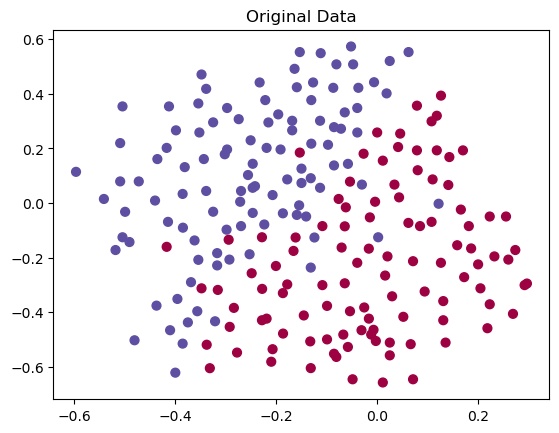

In [83]:
#Self Practice
#L2 Regulrization and dropout
import numpy as np
import matplotlib.pyplot as plt
import scipy

def predict(X, Y, params):
    AL, _ = forward_prop(X, params)
    preds = (AL > 0.5).astype("int")
    print(f"Accuracy: "+ str(np.mean(preds[0, :]==Y[0, :])))
    return preds

def predict_dec(X, params):
    AL, _ = forward_prop(X, params)
    preds = (AL > 0.5).astype("int")
    return preds

def plot_decision_boundary(model, X, Y):
    X_min, X_max = X[0, :].min() - 1.0, X[0, :].max() + 1.0
    Y_min, Y_max = X[1, :].min() - 1.0, X[1, :].max() + 1.0
    h = 0.01
    xx, yy = np.meshgrid(np.arange(X_min, X_max, h), np.arange(Y_min, Y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=plt.cm.Spectral, s=40)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    plt.title("Decision Boundary")
    plt.show()

def relu_derivative(Z):
    g_d = np.where(Z>0, 1, 0)
    return g_d

def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A

def relu(Z):
    A = np.where(Z<=0, 0, Z)
    #Z[Z<=0] = 0
    return A

def optimize_params(params, grads, learning_rate):
    L = len(params) // 2
    for l in range(L):
        params[f"W{l+1}"] = params[f"W{l+1}"] - learning_rate * grads[f"dW{l+1}"]
        params[f"b{l+1}"] = params[f"b{l+1}"] - learning_rate * grads[f"db{l+1}"]
    return params

def backward_prop_dropout(X, A3, Y, cache, keep_prob):
    W1, b1, Z1, D1, A1, W2, b2, Z2, D2, A2, W3, b3, Z3= cache
    grads = {}
    m = Y.shape[1]
    dZ3 = A3 - Y
    dW3 = (1/m) * np.dot(dZ3, A2.T) 
    db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)
    dA2 = np.dot(W3.T, dZ3)
    dA2 = np.multiply(dA2, D2)
    dA2 /= keep_prob
    
    dZ2 = dA2 * relu_derivative(Z2)
    #dZ2 = dA2 * (A2>0).astype(int) 
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dA1 = np.multiply(dA1, D1)
    dA1 /= keep_prob
    
    dZ1 = dA1 * relu_derivative(Z1)
#     dZ1 = dA1 * np.where(Z1>0, 1, 0)  
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    grads = {"dW1": dW1, "db1":db1, "dW2": dW2, "db2":db2, "dW3": dW3, "db3":db3}
    
    return grads

def backward_prop_regularized(X, A3, Y, cache, lambda_):
    W1, b1, Z1, A1, W2, b2, Z2, A2, W3, b3, Z3 = cache
    grads = {}
    m = Y.shape[1]
    dZ3 = A3 - Y
    dW3 = (1/m) * np.dot(dZ3, A2.T) + np.multiply(lambda_ / m, W3) 
    db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = (1/m) * np.dot(dZ2, A1.T) + np.multiply(lambda_ / m, W2) 
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1/m) * np.dot(dZ1, X.T) + np.multiply(lambda_ / m, W1) 
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    grads = {"dW1": dW1, "db1":db1, "dW2": dW2, "db2":db2, "dW3": dW3, "db3":db3}
    
    return grads
    
    
def backward_prop(X, A3, Y, cache):
    W1, b1, Z1, A1, W2, b2, Z2, A2, W3, b3, Z3 = cache
    grads = {}
    m = Y.shape[1]
    dZ3 = A3 - Y
    dW3 = (1/m) * np.dot(dZ3, A2.T)  
    db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1, "db1":db1, "dW2": dW2, "db2":db2, "dW3": dW3, "db3":db3}
    
    return grads

def compute_regularized_cost(A3, Y, params, lambda_):
    m = Y.shape[1]
    loss = np.multiply(Y, np.log(A3)) + np.multiply(1-Y, np.log(1-A3))
    cost = (- 1 / m) * np.sum(loss)
    W1, W2, W3 = params["W1"], params["W2"], params["W3"]
    regularized_cost = (lambda_ / (2*m)) * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))
    final_cost = np.squeeze(cost + regularized_cost)
    return final_cost

def compute_cost(AL, Y):
    m = Y.shape[1]
    loss = np.multiply(Y, np.log(AL)) + np.multiply(1-Y, np.log(1-AL))
    cost = (- 1 / m) * np.nansum(loss)
    cost = np.squeeze(cost)
    return cost

def forward_prop_dropout(X, params, keep_prob):
    W1, b1, W2, b2, W3, b3 = params.values()
    np.random.seed(1)
    
    Z1 = np.dot(W1, X) + b1 
    A1 = relu(Z1)
    D1 = np.random.rand(A1.shape[0], A1.shape[1])
    D1 = (D1 < keep_prob).astype("int")
    A1 = np.multiply(A1, D1)
    A1 /= keep_prob
    
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    D2 = np.random.rand(A2.shape[0], A2.shape[1])
    D2 = (D2 < keep_prob).astype(int)
    A2 = np.multiply(A2, D2)
    A2 /= keep_prob
    
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3) #no dropout for output layer
    
    cache = (W1, b1, Z1, D1, A1, W2, b2, Z2, D2, A2, W3, b3, Z3)
    
    return A3, cache

def forward_prop(X, params):
    W1, b1, W2, b2, W3, b3 = params.values()
    
    Z1 = np.dot(W1, X) + b1 
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (W1, b1, Z1, A1, W2, b2, Z2, A2, W3, b3, Z3)
    
    return A3, cache

def initialize_weights_He(layers_dims):
    np.random.seed(3)
    params = {}
    L = len(layers_dims)
    for l in range(1, L):
        params[f"W{l}"] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2 / layers_dims[l-1])
        params[f"b{l}"] = np.zeros((layers_dims[l], 1))        
    return params

def initialize_weights_xavier(layers_dims):
    np.random.seed(3)
    params = {}
    L = len(layers_dims)
    for l in range(1, L):
        params[f"W{l}"] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(1 / layers_dims[l-1])
        params[f"b{l}"] = np.zeros((layers_dims[l], 1))        
    return params


def nn_model(X, Y, learning_rate=0.3, num_iters=30000, print_cost=False, initialize="xavier", lambda_=0, keep_prob=1.0):
    #3 layer network
    layers_dims = [X.shape[0], 20, 3, 1]
    costs = []
    
    if initialize == "He":
        params = initialize_weights_He(layers_dims)
    elif initialize == "xavier"
        params = initialize_weights_xavier(layers_dims)
        
    for i in range(num_iters):
        
        if keep_prob < 1.0:
            A3, cache = forward_prop_dropout(X, params, keep_prob)
        else:
            A3, cache = forward_prop(X, params)
        
        if lambda_ > 0:
            cost = compute_regularized_cost(A3, Y, params, lambda_)
        else:
            cost = compute_cost(A3, Y) #n0 longer holds true for dropout but we are still calculating
          
        assert (lambda_ == 0 or keep_prob == 1.0), f"Can't run both regularization and dropout sametime for now"
        
        if keep_prob == 1 and lambda_ == 0:
            grads = backward_prop(X, A3, Y, cache)  
        elif lambda_ > 0:
            grads = backward_prop_regularized(X, A3, Y, cache, lambda_)
        elif keep_prob < 1:
            grads = backward_prop_dropout(X, A3, Y, cache, keep_prob)
            
        
        params = optimize_params(params, grads, learning_rate)
        
        if i % 1000 == 0 or i == num_iters - 1:
            costs.append(cost)
        
        if i % 10000 == 0 and print_cost:
            print("Iteration: " +str(i)+ ", Cost: " +str(cost))
            
    plt.plot(costs)
    plt.xlabel("Iterations(per 1000's)")
    plt.ylabel("Costs")
    plt.title(f"Learning curve with learning rate: {learning_rate}")
    plt.show()
    return params

def load_data():
    data = scipy.io.loadmat("./data/data.mat")
    train_X = data["X"].T
    train_Y = data["y"].T
    test_X = data["Xval"].T
    test_Y = data["yval"].T
    
    return train_X, test_X, train_Y, test_Y

train_X, test_X, train_Y, test_Y = load_data()
plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, cmap=plt.cm.Spectral, s=40)
plt.title("Original Data")
plt.show()

  **Actual stats:**
  
      W/o
    Iteration 0, Cost: 0.6557412523481002
    Iteration 10000, Cost: 0.1632998752572417
    Iteration 20000, Cost: 0.138516424232598
    
    On training data:
    Accuracy: 0.9478672985781991
    On Test data:
    Accuracy: 0.915
    
    W reg
    Iteration 0, Cost: 0.6974484493131264
    Iteration 10000, Cost: 0.2684918873282238
    Iteration 20000, Cost: 0.2680916337127301
    
    On the train set:
    Accuracy: 0.9383886255924171
    On the test set:
    Accuracy: 0.93
    
    W dropout
    Iteration 0, Cost: 0.6543912405149825
    Iteration 10000, Cost: 0.0610169865749056
    Iteration 20000, Cost: 0.060582435798513114
    
    On the train set:
    Accuracy: 0.9289099526066351
    On the test set:
    Accuracy: 0.95

    

Iteration: 0, Cost: 0.6557412523481002
Iteration: 10000, Cost: 0.16329987525724188
Iteration: 20000, Cost: 0.1385164242324159


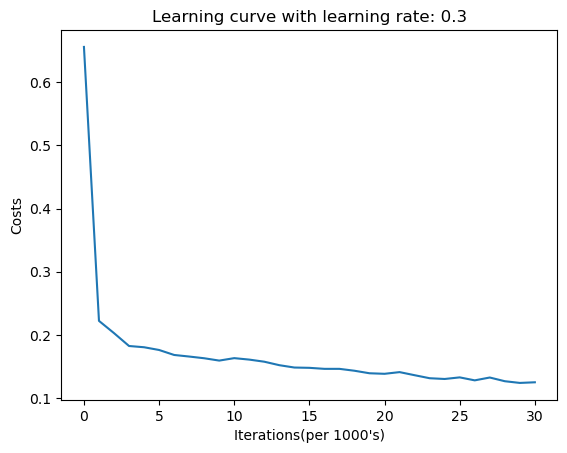

On Train set
Accuracy: 0.9478672985781991
On Test set
Accuracy: 0.915


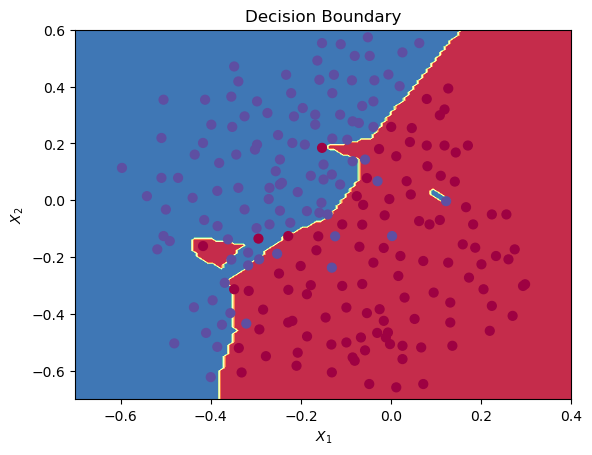

In [85]:
#Training without regularization and dropout and with Xavier regularization
final_params = nn_model(train_X, train_Y, print_cost=True)

#predictions
print("On Train set")
train_preds = predict(train_X, train_Y, final_params)
print("On Test set")
test_preds = predict(test_X, test_Y, final_params)

#classification boundary
axes = plt.gca()
axes.set_xlim([-0.70, 0.4])
axes.set_ylim([-0.70, 0.6])
plot_decision_boundary(lambda x: predict_dec(x.T, final_params), train_X, train_Y)

Iteration: 0, Cost: 0.6974484493131264
Iteration: 10000, Cost: 0.26849188732822393
Iteration: 20000, Cost: 0.2680916337127301


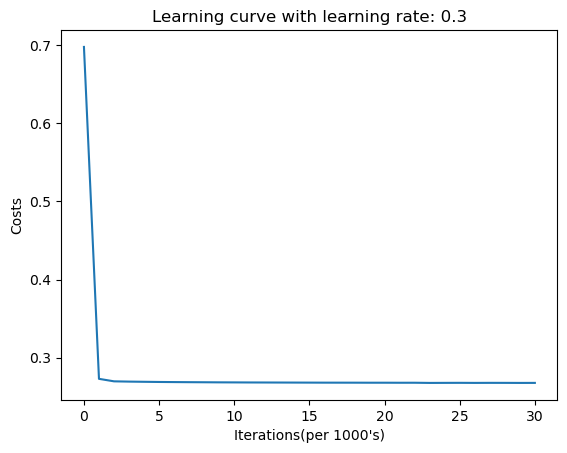

On Train set
Accuracy: 0.9383886255924171
On Test set
Accuracy: 0.93


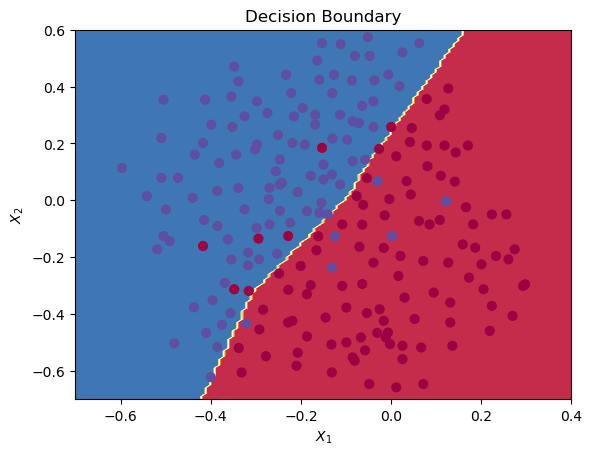

In [86]:
#Training with regularization and with xavier regularization
final_params = nn_model(train_X, train_Y, learning_rate=0.3, num_iters=30000, print_cost=True, initialize="xavier", lambda_=0.7)

#predictions
print("On Train set")
train_preds = predict(train_X, train_Y, final_params)
print("On Test set")
test_preds = predict(test_X, test_Y, final_params)

#classification boundary
axes = plt.gca()
axes.set_xlim([-0.70, 0.4])
axes.set_ylim([-0.70, 0.6])
plot_decision_boundary(lambda x: predict_dec(x.T, final_params), train_X, train_Y)

Iteration: 0, Cost: 0.6543912405149825


C:\Users\malla\AppData\Local\Temp\ipykernel_21280\3707295769.py:130: RuntimeWarning: divide by zero encountered in log
  loss = np.multiply(Y, np.log(AL)) + np.multiply(1-Y, np.log(1-AL))
C:\Users\malla\AppData\Local\Temp\ipykernel_21280\3707295769.py:130: RuntimeWarning: invalid value encountered in multiply
  loss = np.multiply(Y, np.log(AL)) + np.multiply(1-Y, np.log(1-AL))


Iteration: 10000, Cost: 0.0610169865749056
Iteration: 20000, Cost: 0.060582435798513114


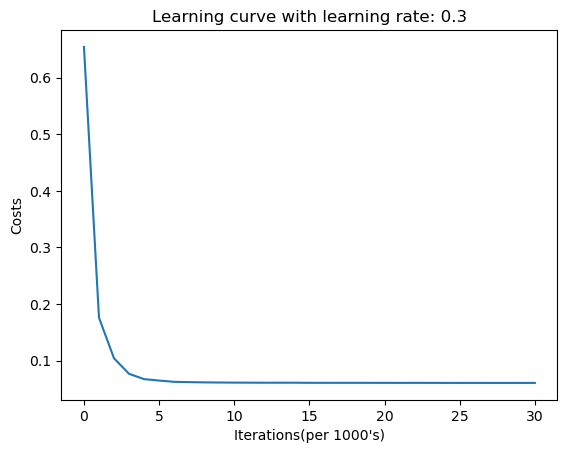

On Train set
Accuracy: 0.9289099526066351
On Test set
Accuracy: 0.95


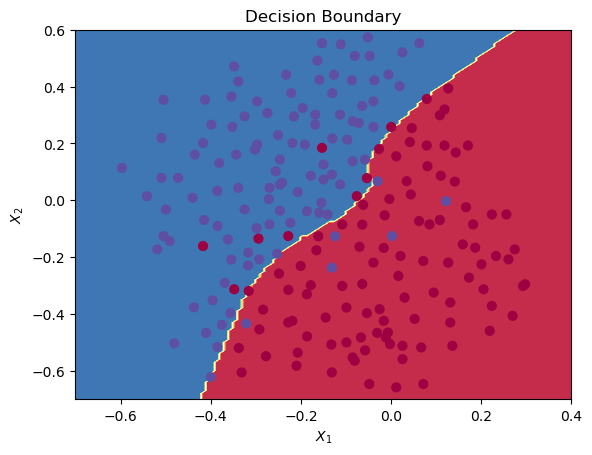

In [84]:
#Training with dropout and with xavier initialization
final_params = nn_model(train_X, train_Y, learning_rate=0.3, num_iters=30000, print_cost=True, initialize="xavier", keep_prob=0.86)

#predictions
print("On Train set")
train_preds = predict(train_X, train_Y, final_params)
print("On Test set")
test_preds = predict(test_X, test_Y, final_params)

#classification boundary
axes = plt.gca()
axes.set_xlim([-0.70, 0.4])
axes.set_ylim([-0.70, 0.6])
plot_decision_boundary(lambda x: predict_dec(x.T, final_params), train_X, train_Y)

Iteration: 0, Cost: 0.6543912405149825


C:\Users\malla\AppData\Local\Temp\ipykernel_21280\3707295769.py:130: RuntimeWarning: divide by zero encountered in log
  loss = np.multiply(Y, np.log(AL)) + np.multiply(1-Y, np.log(1-AL))
C:\Users\malla\AppData\Local\Temp\ipykernel_21280\3707295769.py:130: RuntimeWarning: invalid value encountered in multiply
  loss = np.multiply(Y, np.log(AL)) + np.multiply(1-Y, np.log(1-AL))


Iteration: 10000, Cost: 0.0610169865749056
Iteration: 20000, Cost: 0.060582435798513114


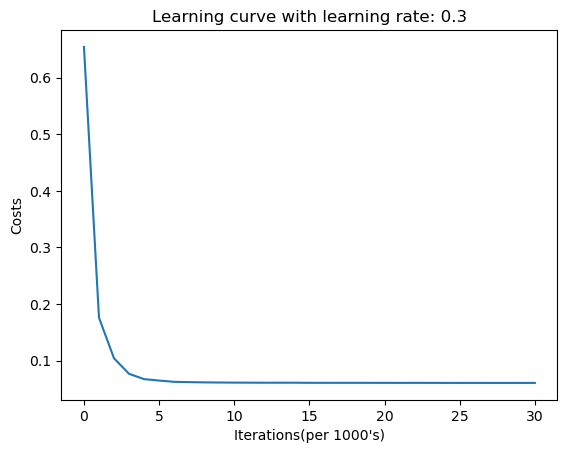

On Train set
Accuracy: 0.9289099526066351
On Test set
Accuracy: 0.95


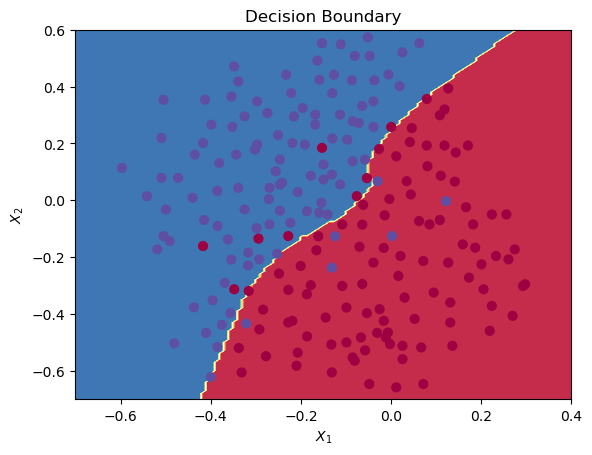

In [88]:
#Training with dropout and with He initialization - no chnage, both initiliazations works same in this case
final_params = nn_model(train_X, train_Y, learning_rate=0.3, num_iters=30000, print_cost=True, initialize="He", keep_prob=0.86)

#predictions
print("On Train set")
train_preds = predict(train_X, train_Y, final_params)
print("On Test set")
test_preds = predict(test_X, test_Y, final_params)

#classification boundary
axes = plt.gca()
axes.set_xlim([-0.70, 0.4])
axes.set_ylim([-0.70, 0.6])
plot_decision_boundary(lambda x: predict_dec(x.T, final_params), train_X, train_Y)

Iteration: 0, Cost: 0.6634619861891963


C:\Users\malla\AppData\Local\Temp\ipykernel_21280\3707295769.py:130: RuntimeWarning: divide by zero encountered in log
  loss = np.multiply(Y, np.log(AL)) + np.multiply(1-Y, np.log(1-AL))
C:\Users\malla\AppData\Local\Temp\ipykernel_21280\3707295769.py:130: RuntimeWarning: invalid value encountered in multiply
  loss = np.multiply(Y, np.log(AL)) + np.multiply(1-Y, np.log(1-AL))


Iteration: 10000, Cost: 0.05040089794130624
Iteration: 20000, Cost: 0.04972235102906052


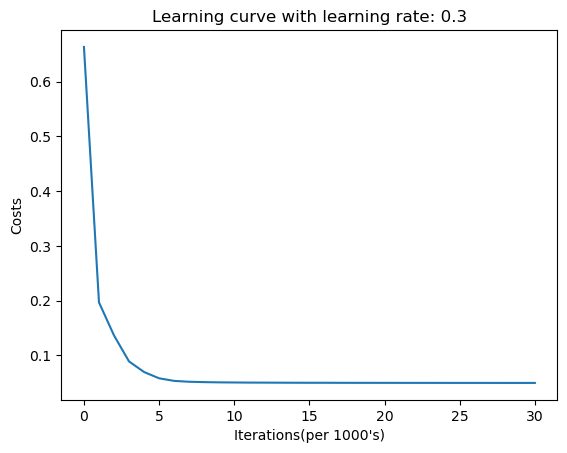

On Train set
Accuracy: 0.933649289099526
On Test set
Accuracy: 0.95


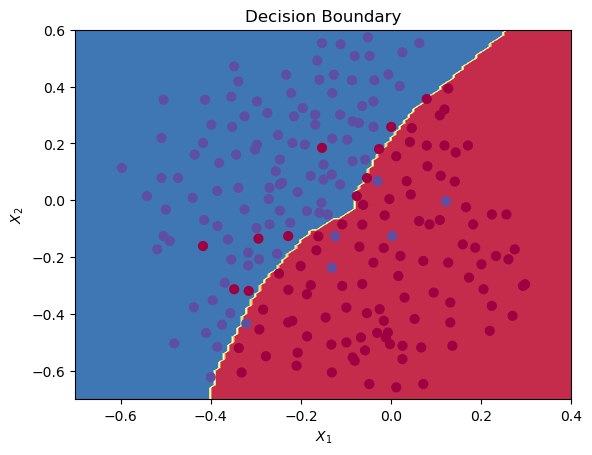

In [89]:
#Training with dropout and without inverted dropout i.e without scaling /=keep_prob

def backward_prop_dropout(X, A3, Y, cache, keep_prob):
    W1, b1, Z1, D1, A1, W2, b2, Z2, D2, A2, W3, b3, Z3= cache
    grads = {}
    m = Y.shape[1]
    dZ3 = A3 - Y
    dW3 = (1/m) * np.dot(dZ3, A2.T) 
    db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)
    dA2 = np.dot(W3.T, dZ3)
    dA2 = np.multiply(dA2, D2)
#     dA2 /= keep_prob #removing this
    
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dA1 = np.multiply(dA1, D1)
#     dA1 /= keep_prob #removing this
    
    dZ1 = dA1 * relu_derivative(Z1)  
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    grads = {"dW1": dW1, "db1":db1, "dW2": dW2, "db2":db2, "dW3": dW3, "db3":db3}
    
    return grads

def forward_prop_dropout(X, params, keep_prob):
    W1, b1, W2, b2, W3, b3 = params.values()
    np.random.seed(1)
    
    Z1 = np.dot(W1, X) + b1 
    A1 = relu(Z1)
    D1 = np.random.rand(A1.shape[0], A1.shape[1])
    D1 = (D1 < keep_prob).astype("int")
    A1 = np.multiply(A1, D1)
#     A1 /= keep_prob #removing this
    
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    D2 = np.random.rand(A2.shape[0], A2.shape[1])
    D2 = (D2 < keep_prob).astype(int)
    A2 = np.multiply(A2, D2)
#    A2 /= keep_prob #removing this
    
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3) #no dropout for output layer
    
    cache = (W1, b1, Z1, D1, A1, W2, b2, Z2, D2, A2, W3, b3, Z3)
    
    return A3, cache

final_params = nn_model(train_X, train_Y, learning_rate=0.3, num_iters=30000, print_cost=True, keep_prob=0.86)

#predictions
print("On Train set")
train_preds = predict(train_X, train_Y, final_params)
print("On Test set")
test_preds = predict(test_X, test_Y, final_params)

#classification boundary
axes = plt.gca()
axes.set_xlim([-0.70, 0.4])
axes.set_ylim([-0.70, 0.6])
plot_decision_boundary(lambda x: predict_dec(x.T, final_params), train_X, train_Y)

# With inverted dropout recordings
# Iteration: 0, Cost: 0.6543912405149825
# Iteration: 10000, Cost: 0.0610169865749056
# Iteration: 20000, Cost: 0.060582435798513114
# On Train set, Accuracy: 0.9289099526066351
# On Test set, Accuracy: 0.95

#overfit a little for the training data, test accuracy remains same in this case, 
#but usually, the scaling will not match with test as the training scale is reduced with dropout

Iteration: 0, Cost: 0.6634619861891963


C:\Users\malla\AppData\Local\Temp\ipykernel_21280\3707295769.py:130: RuntimeWarning: divide by zero encountered in log
  loss = np.multiply(Y, np.log(AL)) + np.multiply(1-Y, np.log(1-AL))
C:\Users\malla\AppData\Local\Temp\ipykernel_21280\3707295769.py:130: RuntimeWarning: invalid value encountered in multiply
  loss = np.multiply(Y, np.log(AL)) + np.multiply(1-Y, np.log(1-AL))


Iteration: 10000, Cost: 0.05040089794130624
Iteration: 20000, Cost: 0.04972235102906052


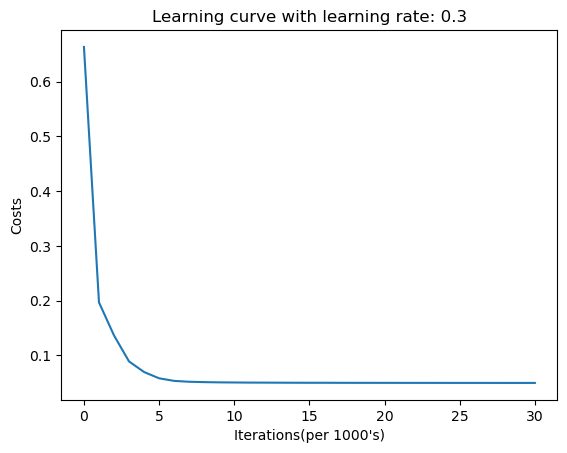

On Train set
Accuracy: 0.933649289099526
On Test set
Accuracy: 0.945


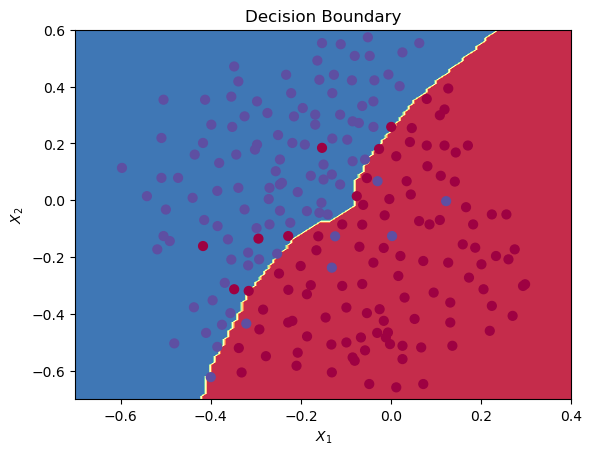

In [91]:
#dropout and without inverted drop scaling in training, in testing with scaling W*keep_prob to see how it effects the testing


def forward_prop_test(X, params, keep_prob):
    W1, b1, W2, b2, W3, b3 = params.values()
    
    Z1 = np.dot(W1, X) + b1 
    A1 = relu(Z1)
    A1 *= keep_prob #adding this scaling at test phase
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    A2 *= keep_prob
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (W1, b1, Z1, A1, W2, b2, Z2, A2, W3, b3, Z3)
    
    return A3, cache

def predict(X, Y, params, keep_prob):
    AL, _ = forward_prop_test(X, params, keep_prob)
    preds = (AL > 0.5).astype("int")
    print(f"Accuracy: "+ str(np.mean(preds[0, :]==Y[0, :])))
    return preds

def predict_dec(X, params, keep_prob):
    AL, _ = forward_prop_test(X, params, keep_prob)
    preds = (AL > 0.5).astype("int")
    return preds

def backward_prop_dropout(X, A3, Y, cache, keep_prob):
    W1, b1, Z1, D1, A1, W2, b2, Z2, D2, A2, W3, b3, Z3= cache
    grads = {}
    m = Y.shape[1]
    dZ3 = A3 - Y
    dW3 = (1/m) * np.dot(dZ3, A2.T) 
    db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)
    dA2 = np.dot(W3.T, dZ3)
    dA2 = np.multiply(dA2, D2)
#     dA2 /= keep_prob #removing this
    
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dA1 = np.multiply(dA1, D1)
#     dA1 /= keep_prob #removing this
    
    dZ1 = dA1 * relu_derivative(Z1)  
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    grads = {"dW1": dW1, "db1":db1, "dW2": dW2, "db2":db2, "dW3": dW3, "db3":db3}
    
    return grads

def forward_prop_dropout(X, params, keep_prob):
    W1, b1, W2, b2, W3, b3 = params.values()
    np.random.seed(1)
    
    Z1 = np.dot(W1, X) + b1 
    A1 = relu(Z1)
    D1 = np.random.rand(A1.shape[0], A1.shape[1])
    D1 = (D1 < keep_prob).astype("int")
    A1 = np.multiply(A1, D1)
#     A1 /= keep_prob #removing this
    
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    D2 = np.random.rand(A2.shape[0], A2.shape[1])
    D2 = (D2 < keep_prob).astype(int)
    A2 = np.multiply(A2, D2)
#    A2 /= keep_prob #removing this
    
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3) #no dropout for output layer
    
    cache = (W1, b1, Z1, D1, A1, W2, b2, Z2, D2, A2, W3, b3, Z3)
    
    return A3, cache

keep_prob = 0.86
final_params = nn_model(train_X, train_Y, learning_rate=0.3, num_iters=30000, print_cost=True, keep_prob=keep_prob)

#predictions
print("On Train set")
train_preds = predict(train_X, train_Y, final_params, keep_prob)
print("On Test set")
test_preds = predict(test_X, test_Y, final_params, keep_prob)

#classification boundary
axes = plt.gca()
axes.set_xlim([-0.70, 0.4])
axes.set_ylim([-0.70, 0.6])
plot_decision_boundary(lambda x: predict_dec(x.T, final_params, keep_prob), train_X, train_Y)

# With inverted dropout recordings
# Iteration: 0, Cost: 0.6543912405149825
# Iteration: 10000, Cost: 0.0610169865749056
# Iteration: 20000, Cost: 0.060582435798513114
# On Train set, Accuracy: 0.9289099526066351
# On Test set, Accuracy: 0.95